# T cells mapped to T2T version 2.0
# Day 28 post EP for CRISPoff and unedited
# Pipeline to Extract and Analyze mC profiles from BAM files and look at Forward & Reverse strands

Date: Sept. 7, 2025
Modify the window of the input size

Save subsets of reads

In [2]:
import sys
from pathlib import Path
from datetime import datetime

from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
# import time
# import shap


# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    remove_low_methylated_reads,
    process_extracted_reads_no_fully_unmethylated,
    create_padded_reads_no_fully_unmethylated,
    subset_BAM_by_read_IDs,
    bam_to_sam,
    plot_bam_quality_metrics
    # main,
)
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline

modkit found with expected version 0.2.4


In [3]:
system_info()
date_today = datetime.today().strftime('%Y-%m-%d')
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta')
reg_genome_version = "t2t_v2_0"
region_chr = 'chr1'

# 6500bps: EXACT cutting region  
# chr1:206,583,334-206,589,873
region_start = 206583334    + 20
region_end = 206589874      - 20 
# CD55 TSS start: chr1:206586828-206606065 (+)
# (before TSS: 3474, after TSS: 3026 bps)

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_path, region_chr, region_start, region_end)

print('region_chr', region_chr)
print('region_start', region_start)
print('region_end', region_end)
print(f'{region_chr}:{region_start}-{region_end}') 

System: Linux
Release: 6.8.0-79-generic
Version: #79~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Fri Aug 15 16:54:53 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTA

# Look at UNEDITED (NT = Not Treated) T cells at day 6 post EP (with no proteins)


In [7]:
# Look at Unedited(NT) T cells at day 28 post EP (with no proteins)

folder_path = "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/"
bam_name = "sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
unedit_bam_path = folder_path + bam_name

unedit_bam_path

'/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

In [8]:
day_num = 28
day_num

28

In [9]:
output_dir_path = '/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/' # "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/"
output_dir_path


'/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/'

In [10]:
original_bam_path = unedit_bam_path
original_bam_path

'/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

experiment_name =  day28_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2
Region length: 6500
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merg…

          |    0%

          | Transferring 53 from reads.CG,0.txt into reads.combined_basemods.h5, new size 53   0% | 00:00<?

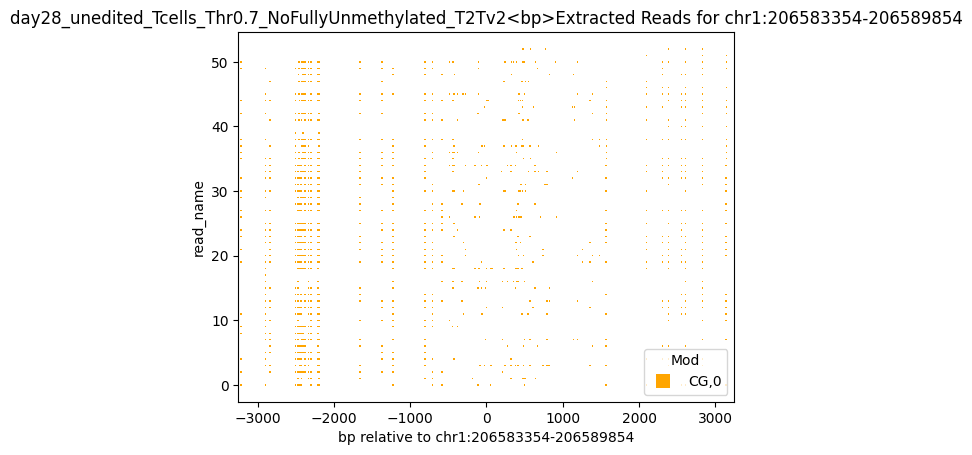

Found read coordinates: 53 reads
Unique read names with methylation: 53
In function count_indels_and_mismatches: Processing region is chr1:206583354-206589854
In function count_indels_and_mismatches: Region length is 6500
Found 26 reads with full coverage
Reads with methylation data: 53
Overlap between full coverage and methylation: 26
After full coverage filtering: 26 reads with methylation data
After removing reads with <90.0% threshold_fraction_overlap_aligned: 26 reads with methylation data
After removing reads with >70.0% threshold_fraction_mismatches: 26 reads with methylation data
After removing reads with >60 threshold_mapping_qualities: 26 reads with methylation data
After removing reads with >20 threshold_avg_base_qualities: 23 reads with methylation data
Final result: 589 reads with methylation information out of 53 total reads
Subset BAM written to: dimelo_v2_output/filtered_reads_overlap_MORE_than_0.9_day28_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam
Index written

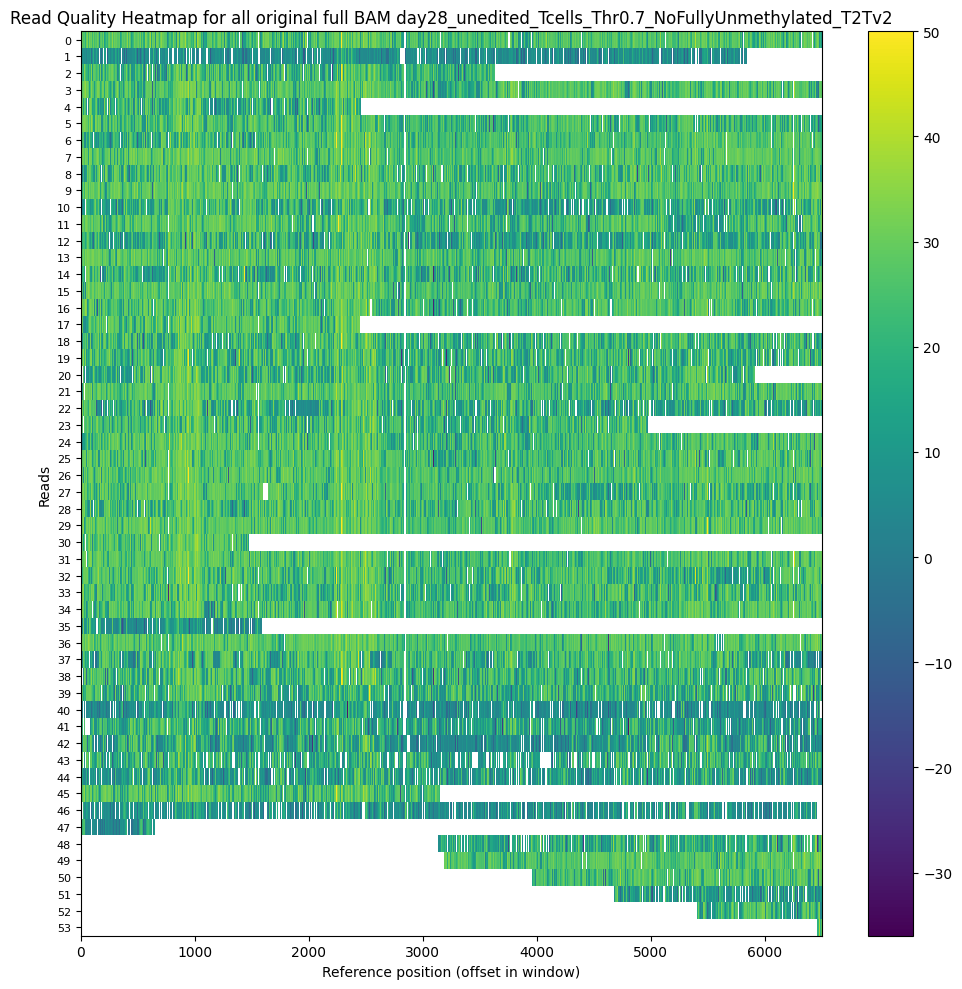

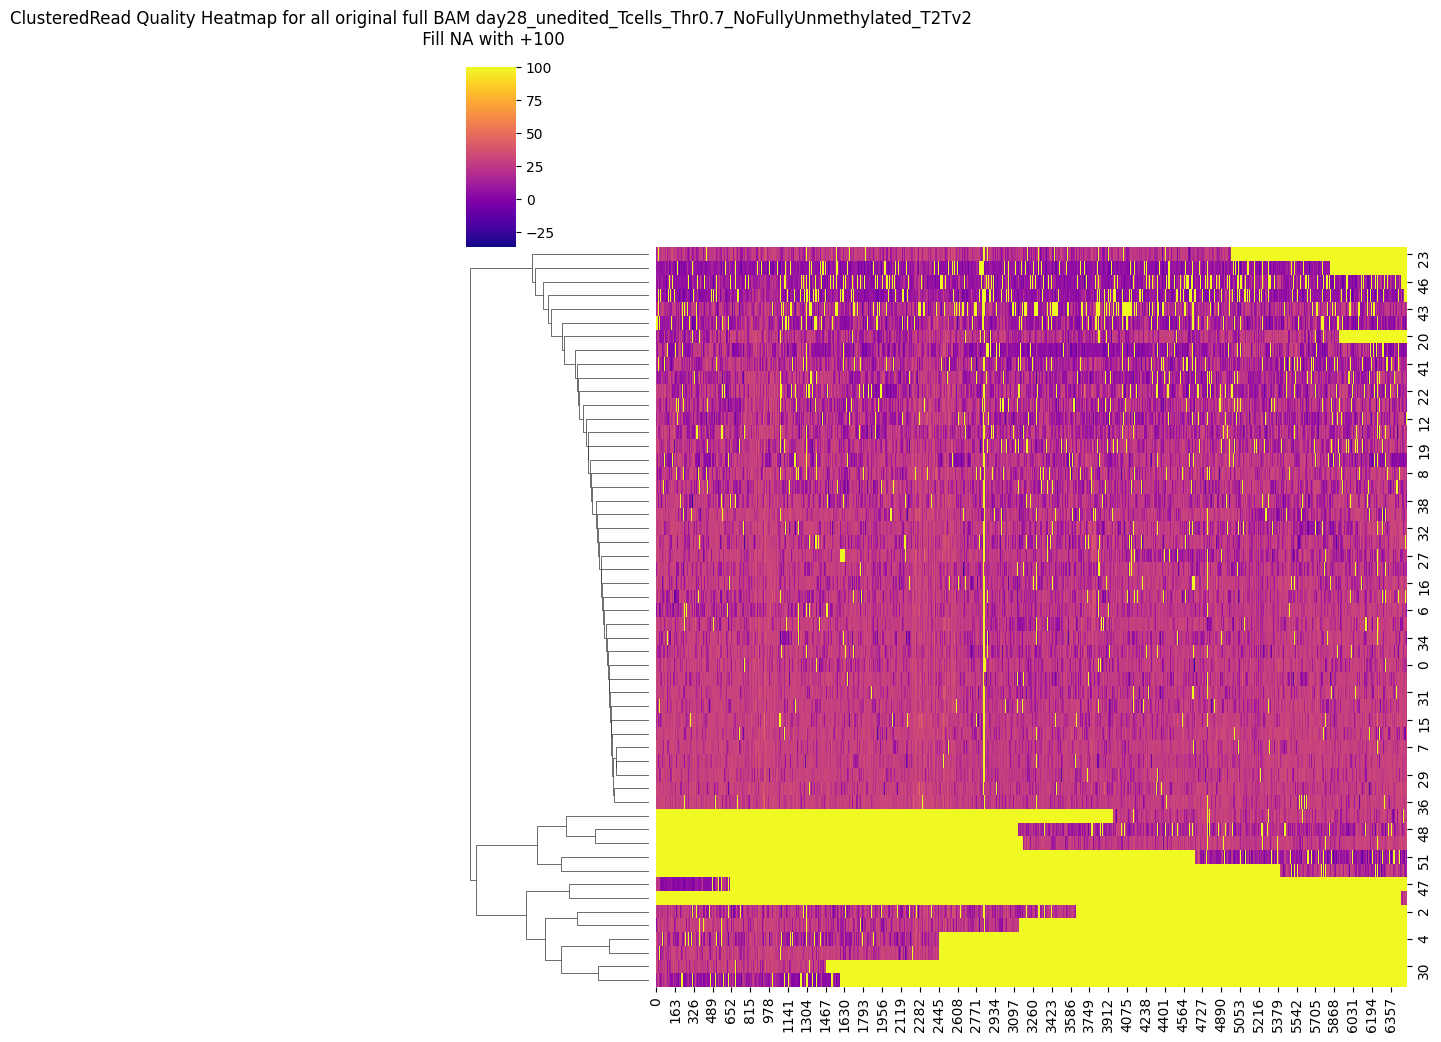

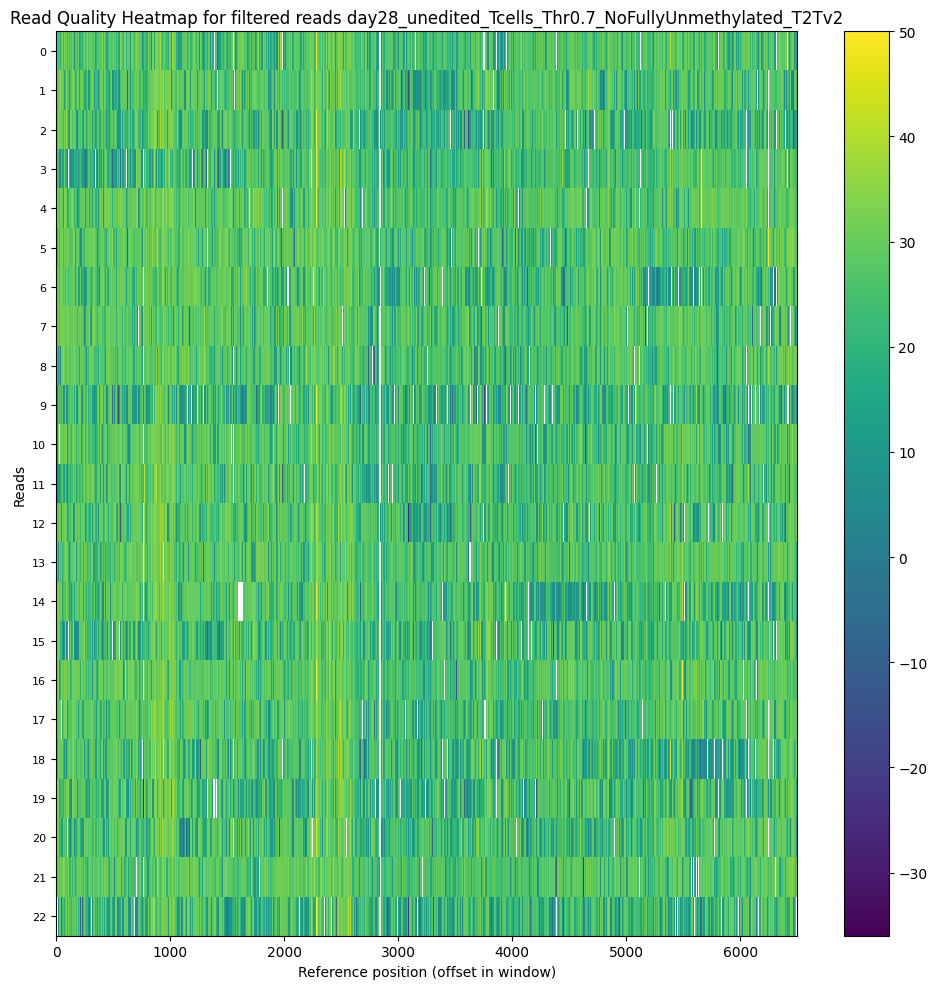

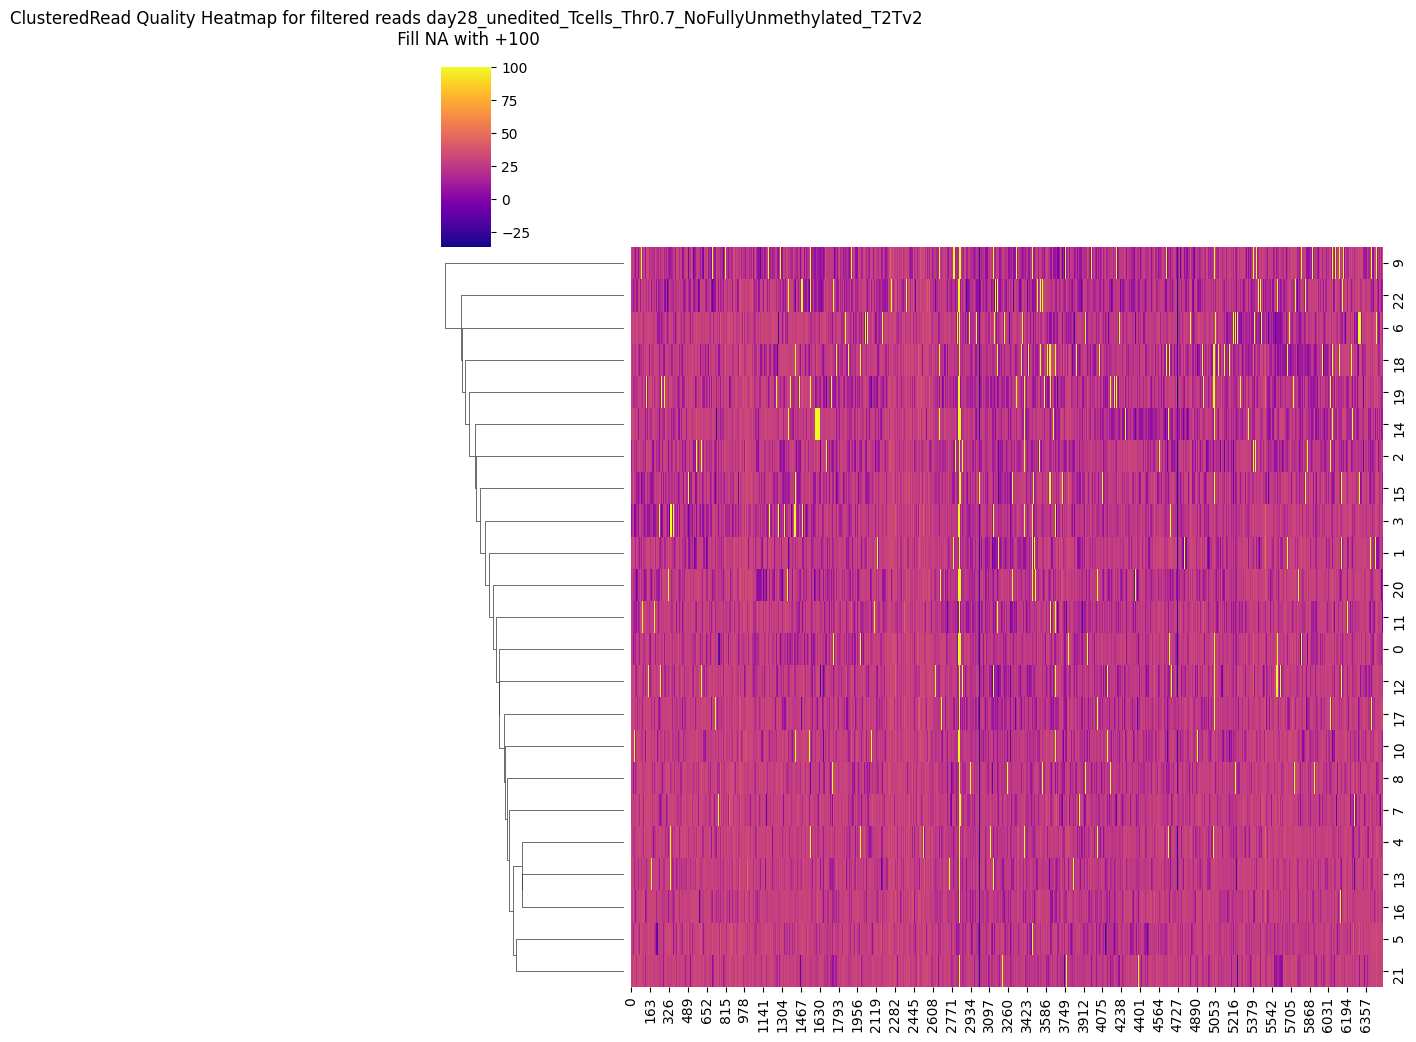

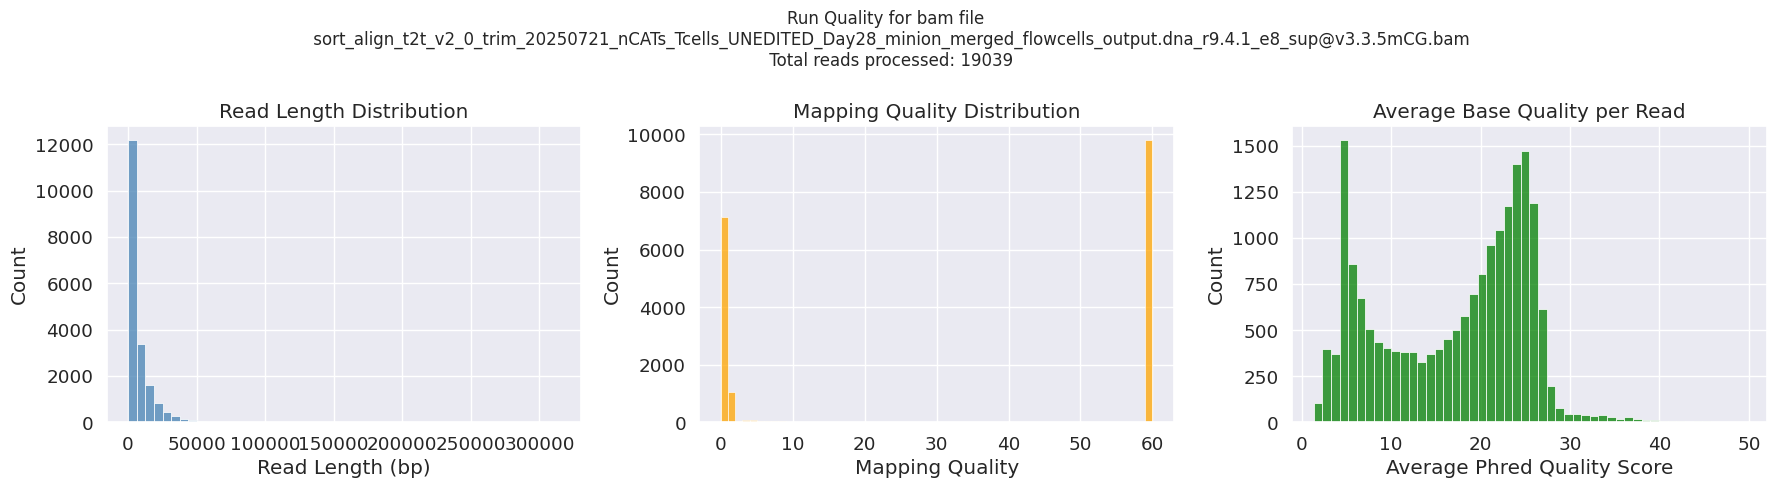

Total reads processed: 19039


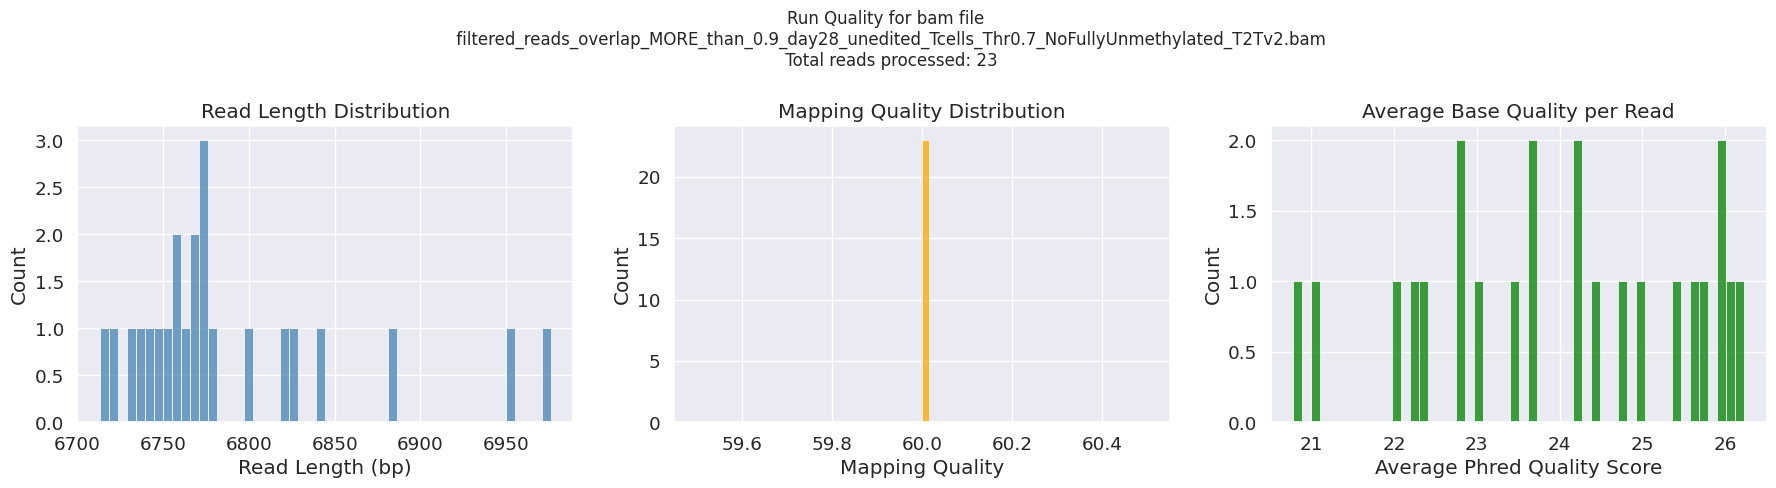

Total reads processed: 23


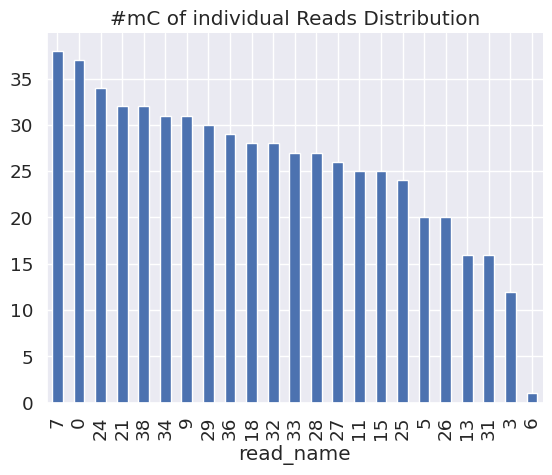

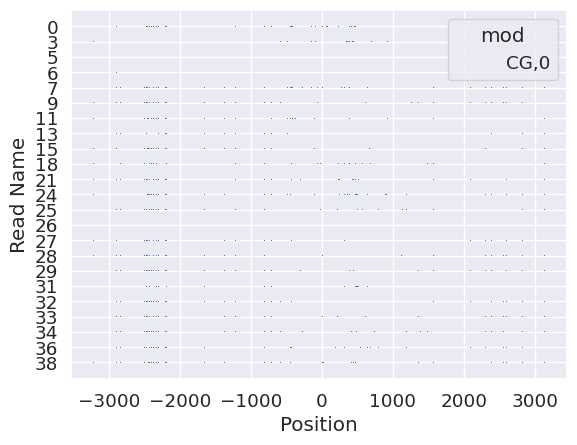

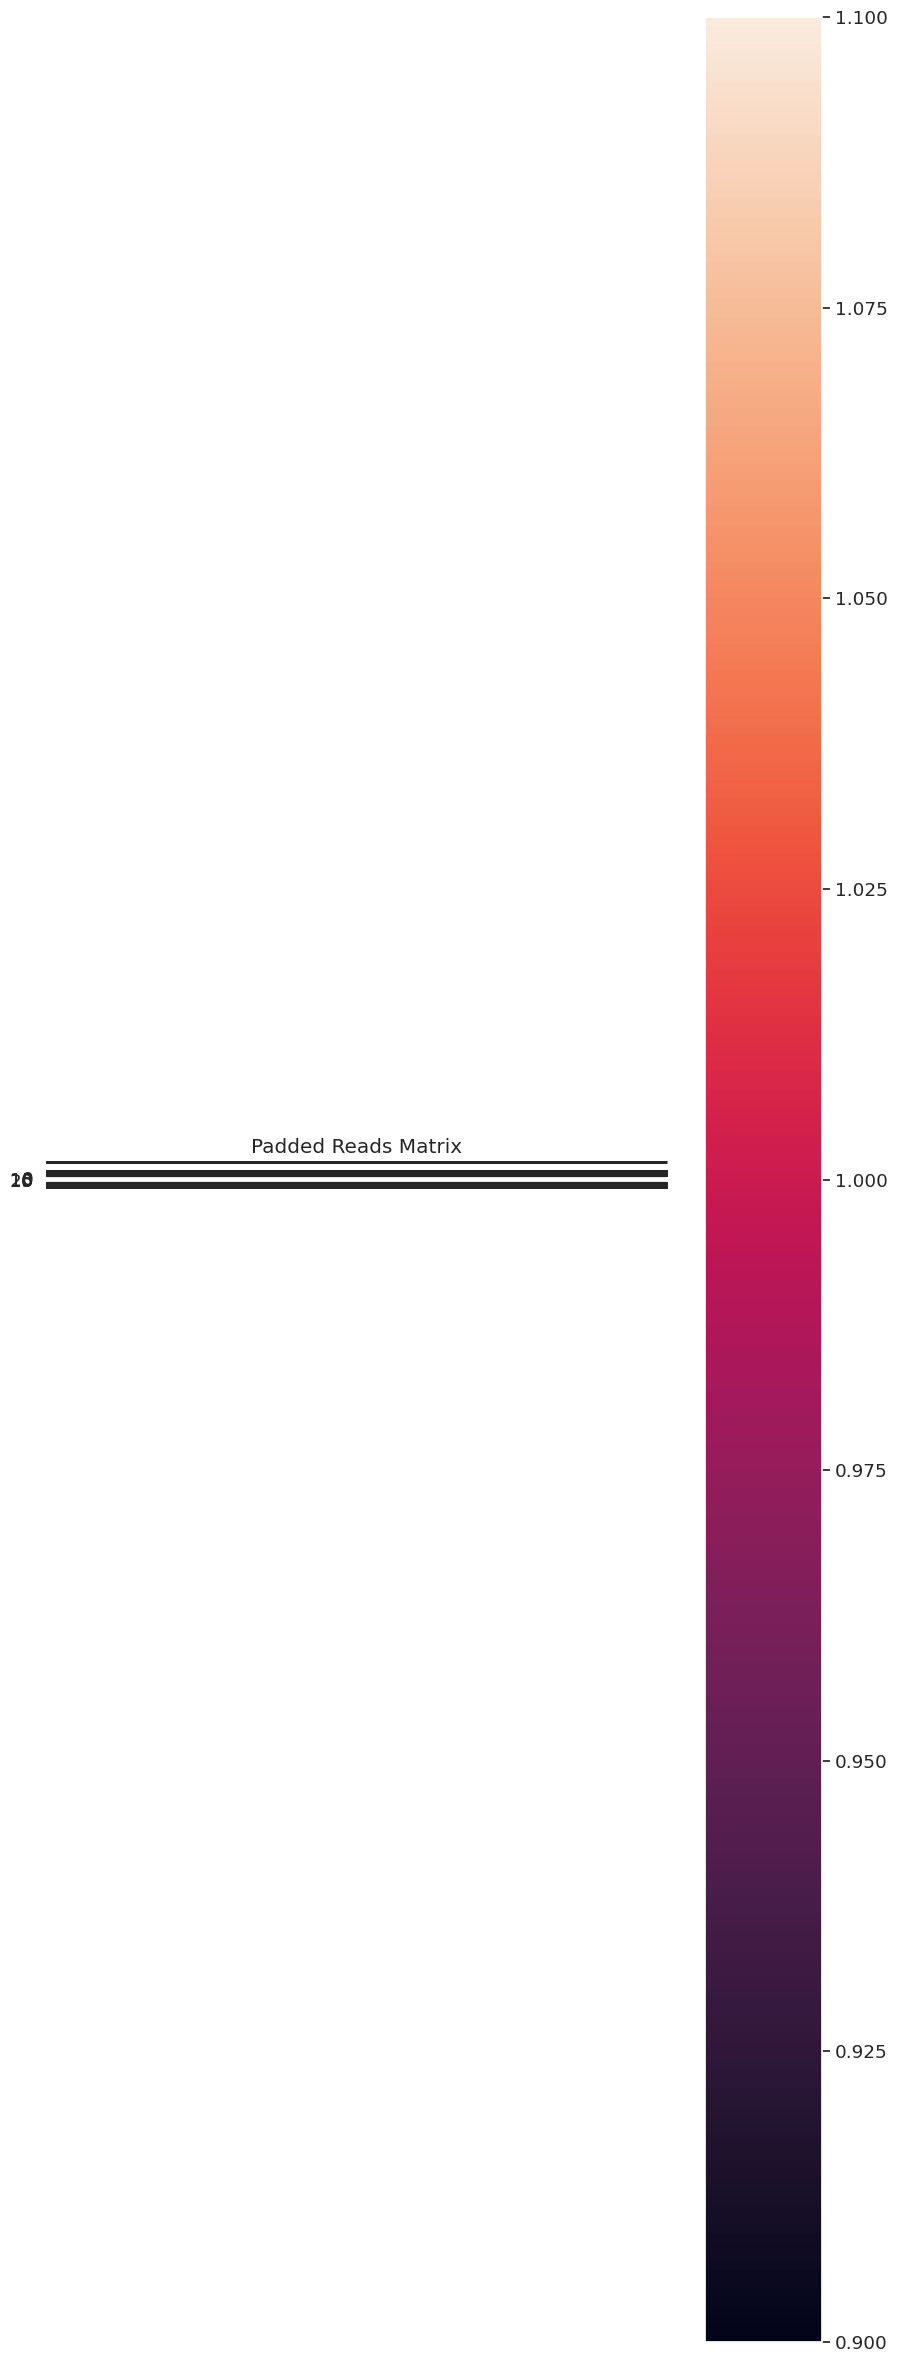

Padded reads saved to padded_reads_day28_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-07.npy
Padded reads loaded successfully.


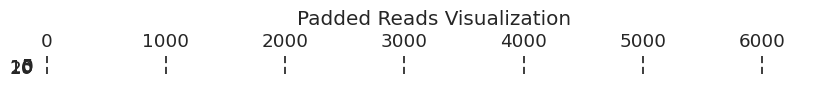

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

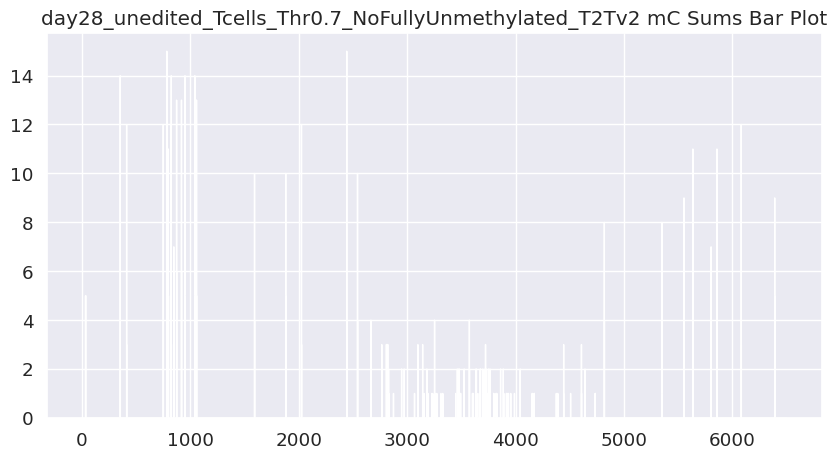

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


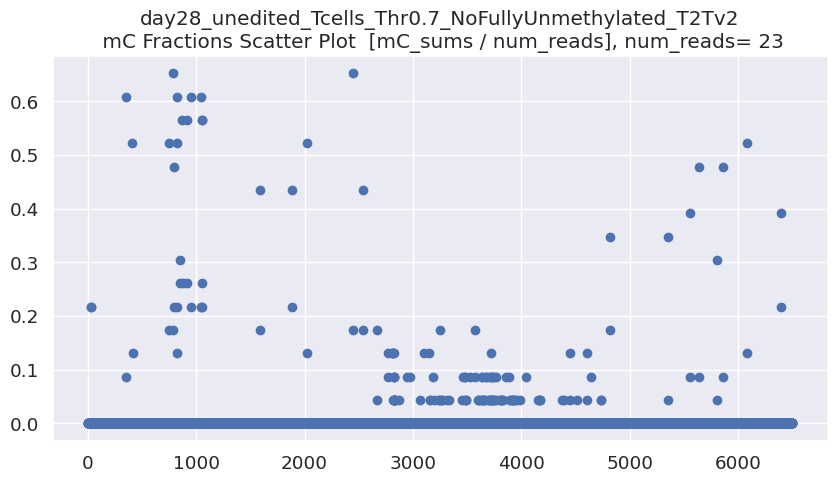

len(CGs_all) = 23
CGs_all.shape = (23, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


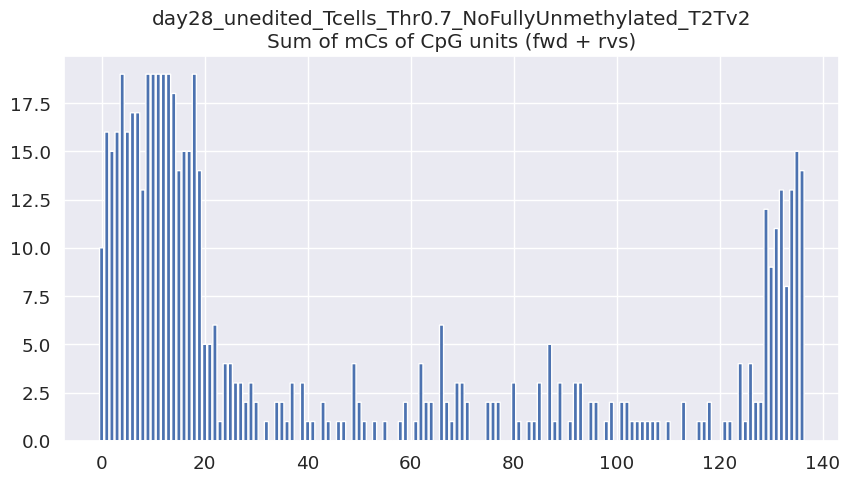

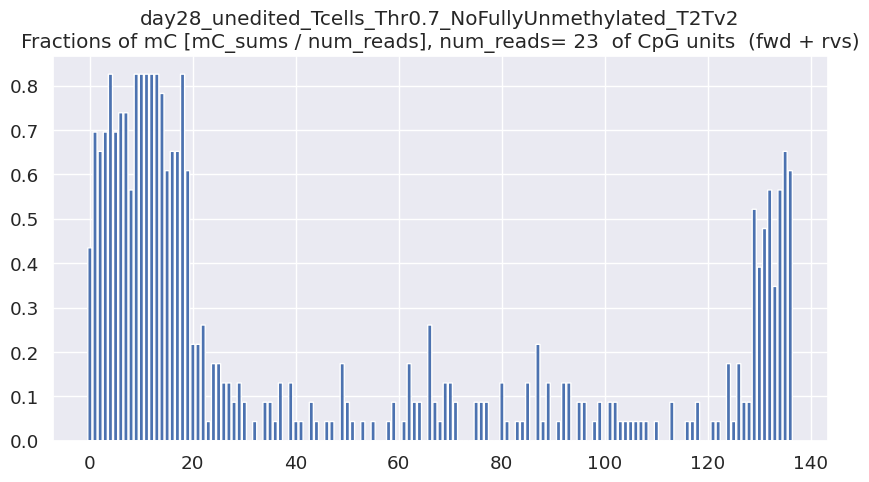

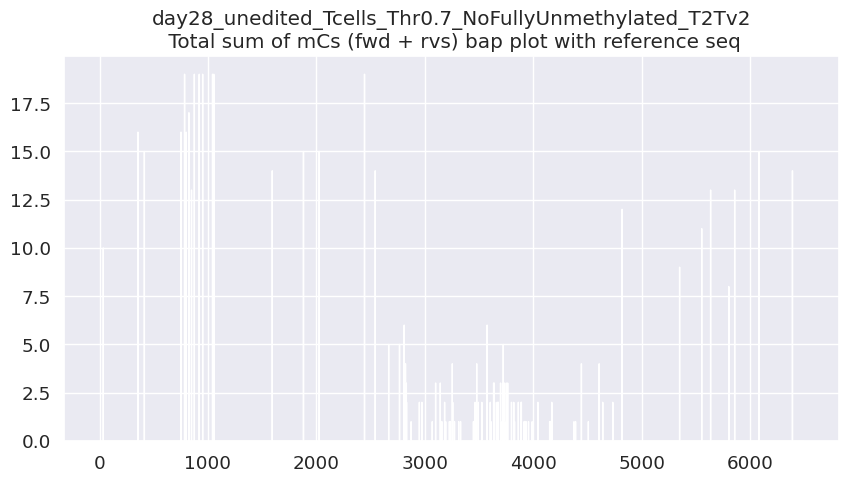

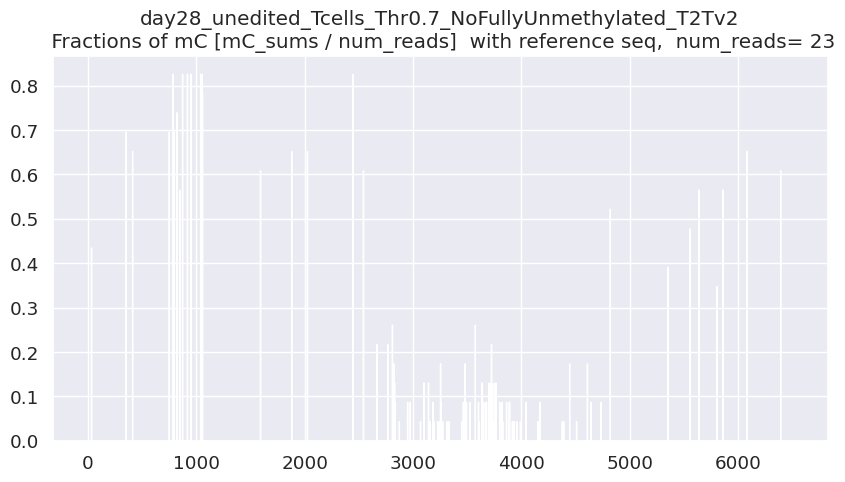

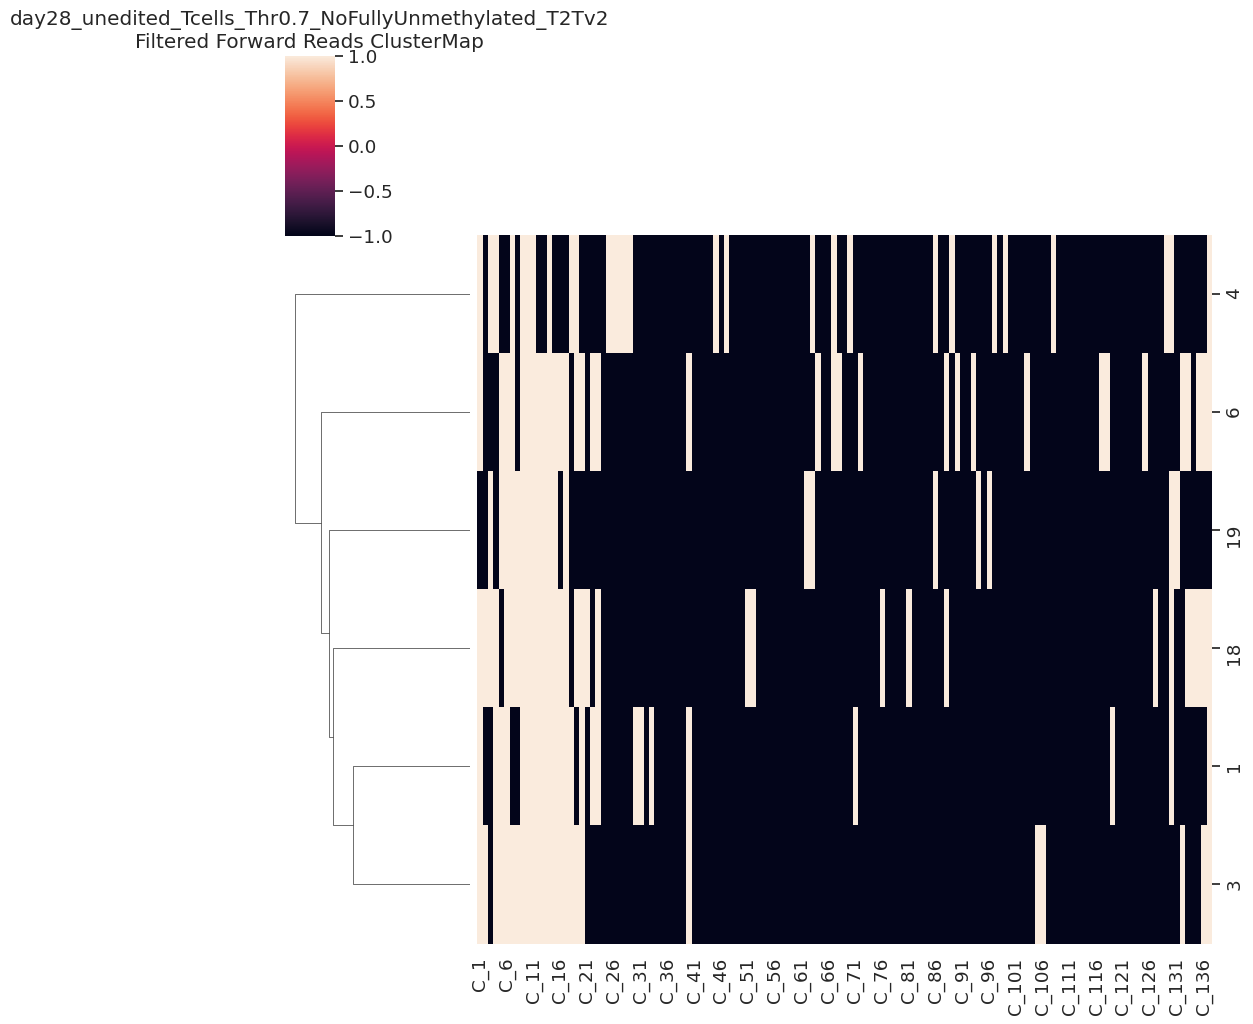

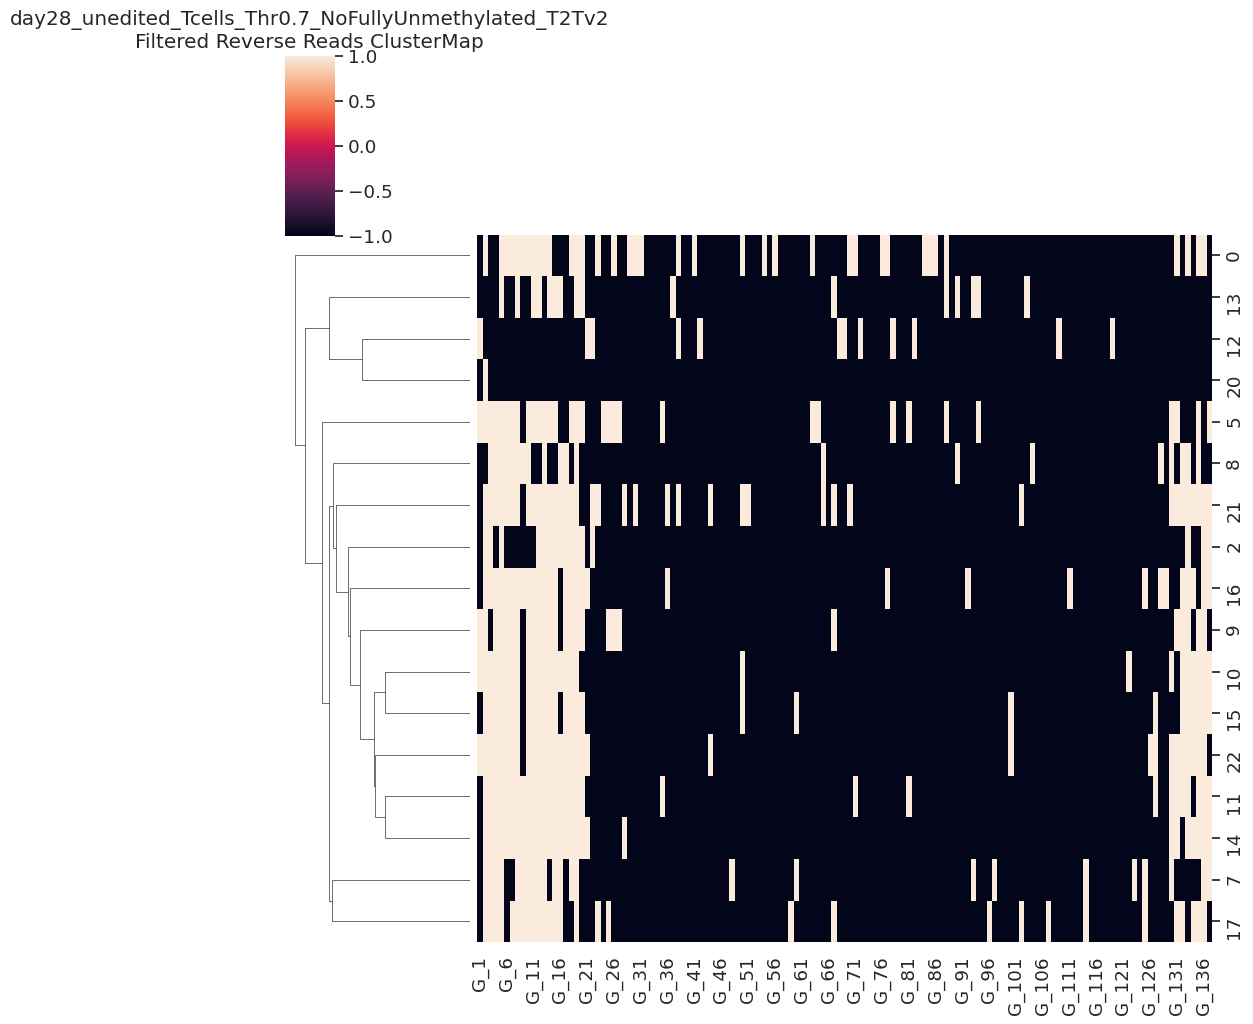

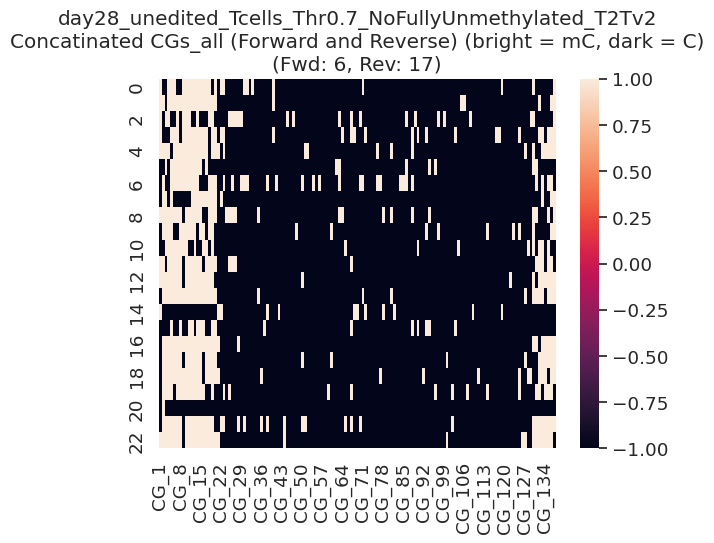

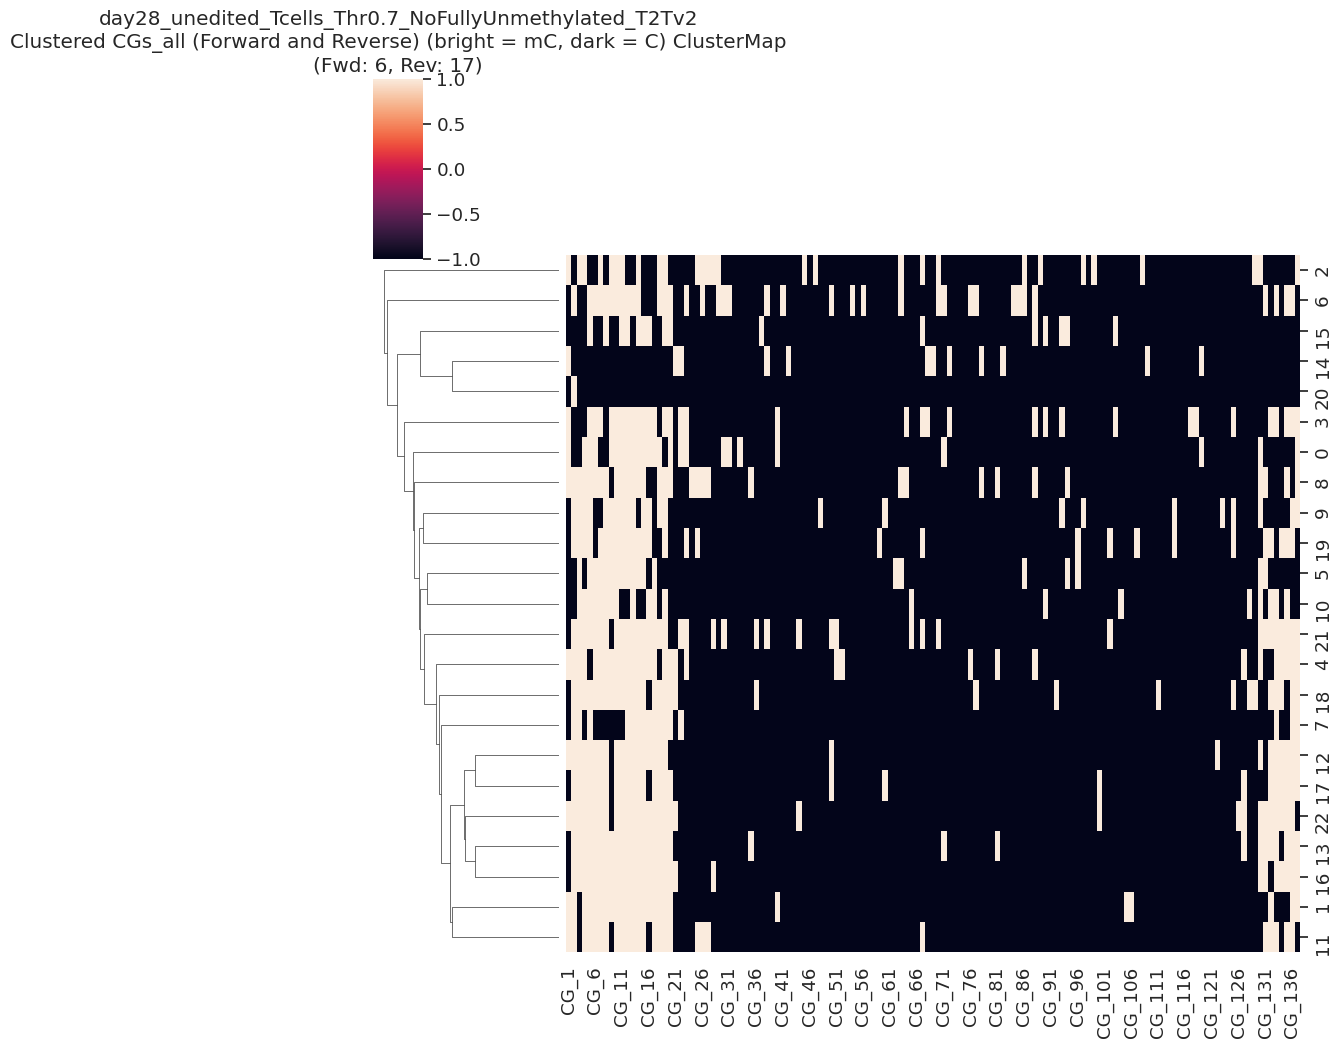

CGs_all saved as CG_137_padded_reads_day28_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-07_units_combined_numFWD6_numRVS17.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [11]:
threshold_mC = 0.7 # 0.995 #0.7 #  0.9 #0.99

max_reads_plot = 3000

threshold_mapping_qualities=60 
threshold_avg_base_qualities=20

threshold_fraction_overlap_aligned = 0.9 # 0.1
threshold_fraction_mismatches = 0.7 # 0.5
# indel_fraction_threshold = 1  # 0.8
# non_fraction_threshold   = 1

experiment_name = "day"+str(day_num)+"_unedited_Tcells_Thr"+str(threshold_mC)+"_NoFullyUnmethylated_T2Tv2"

bam_path = original_bam_path #  unedit_bam_path

print('experiment_name = ', experiment_name)

save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

extract_file, extract_regions = extract_from_bam(
    experiment_name = experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    region=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
keep_full_coverage_reads_only=True

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, bam_path, region_str, 
        motifs, ref_seq_list, ref_genome_path=ref_genome_path, 
        experiment_name=experiment_name, output_dir=output_dir, 
        keep_full_coverage_reads_only=keep_full_coverage_reads_only,
        threshold_fraction_overlap_aligned=threshold_fraction_overlap_aligned,
        threshold_fraction_mismatches=threshold_fraction_mismatches,
        threshold_mapping_qualities=threshold_mapping_qualities, 
        threshold_avg_base_qualities=threshold_avg_base_qualities,
        max_reads_plot=max_reads_plot)
        # indel_fraction_threshold=indel_fraction_threshold, 
        # non_fraction_threshold=non_fraction_threshold)
        
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


experiment_name =  day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2
Region length: 6500
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.995 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merg…

          |    0%

          | Transferring 53 from reads.CG,0.txt into reads.combined_basemods.h5, new size 53   0% | 00:00<?

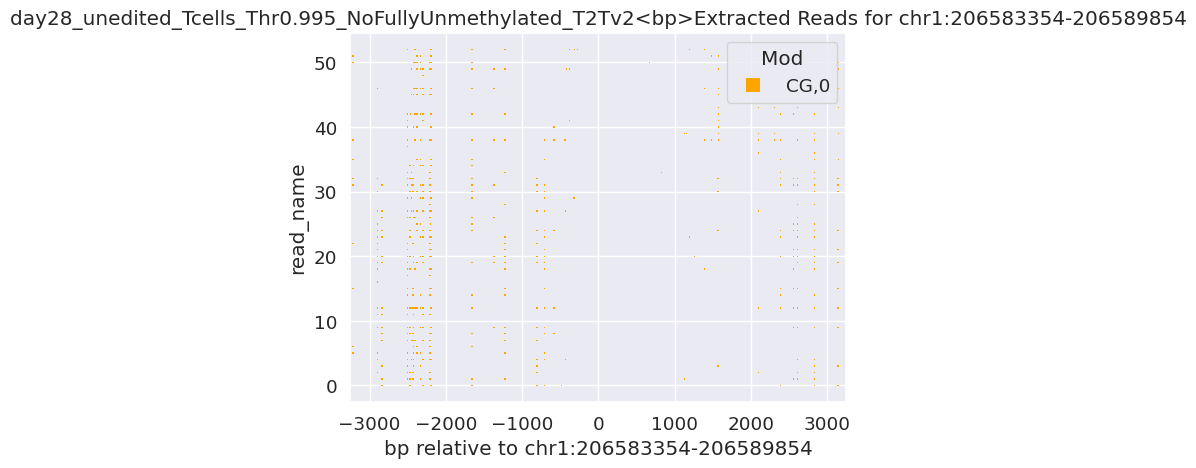

Found read coordinates: 53 reads
Unique read names with methylation: 50
In function count_indels_and_mismatches: Processing region is chr1:206583354-206589854
In function count_indels_and_mismatches: Region length is 6500
Found 26 reads with full coverage
Reads with methylation data: 50
Overlap between full coverage and methylation: 25
After full coverage filtering: 25 reads with methylation data
After removing reads with <90.0% threshold_fraction_overlap_aligned: 25 reads with methylation data
After removing reads with >70.0% threshold_fraction_mismatches: 25 reads with methylation data
After removing reads with >60 threshold_mapping_qualities: 25 reads with methylation data
After removing reads with >20 threshold_avg_base_qualities: 22 reads with methylation data
Final result: 238 reads with methylation information out of 53 total reads
Subset BAM written to: dimelo_v2_output/filtered_reads_overlap_MORE_than_0.9_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam
Index writt

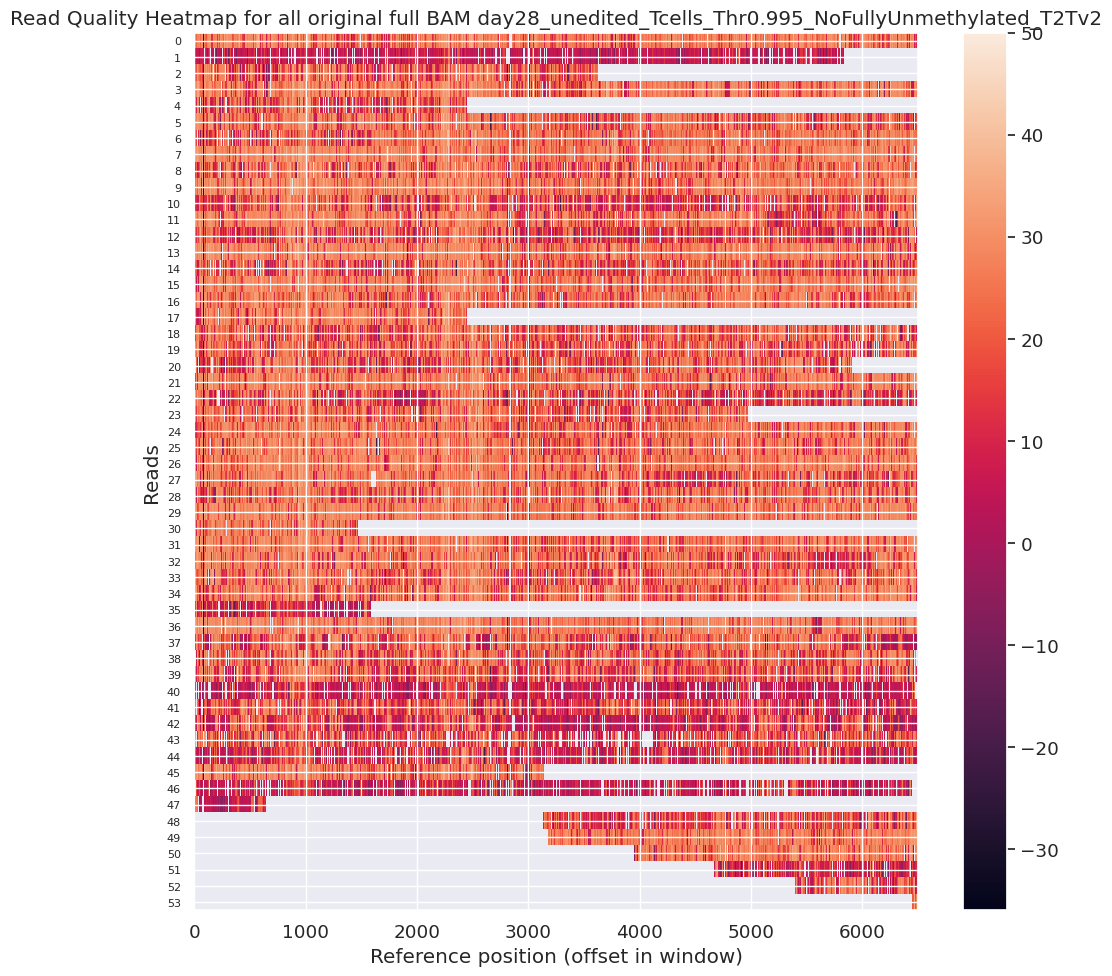

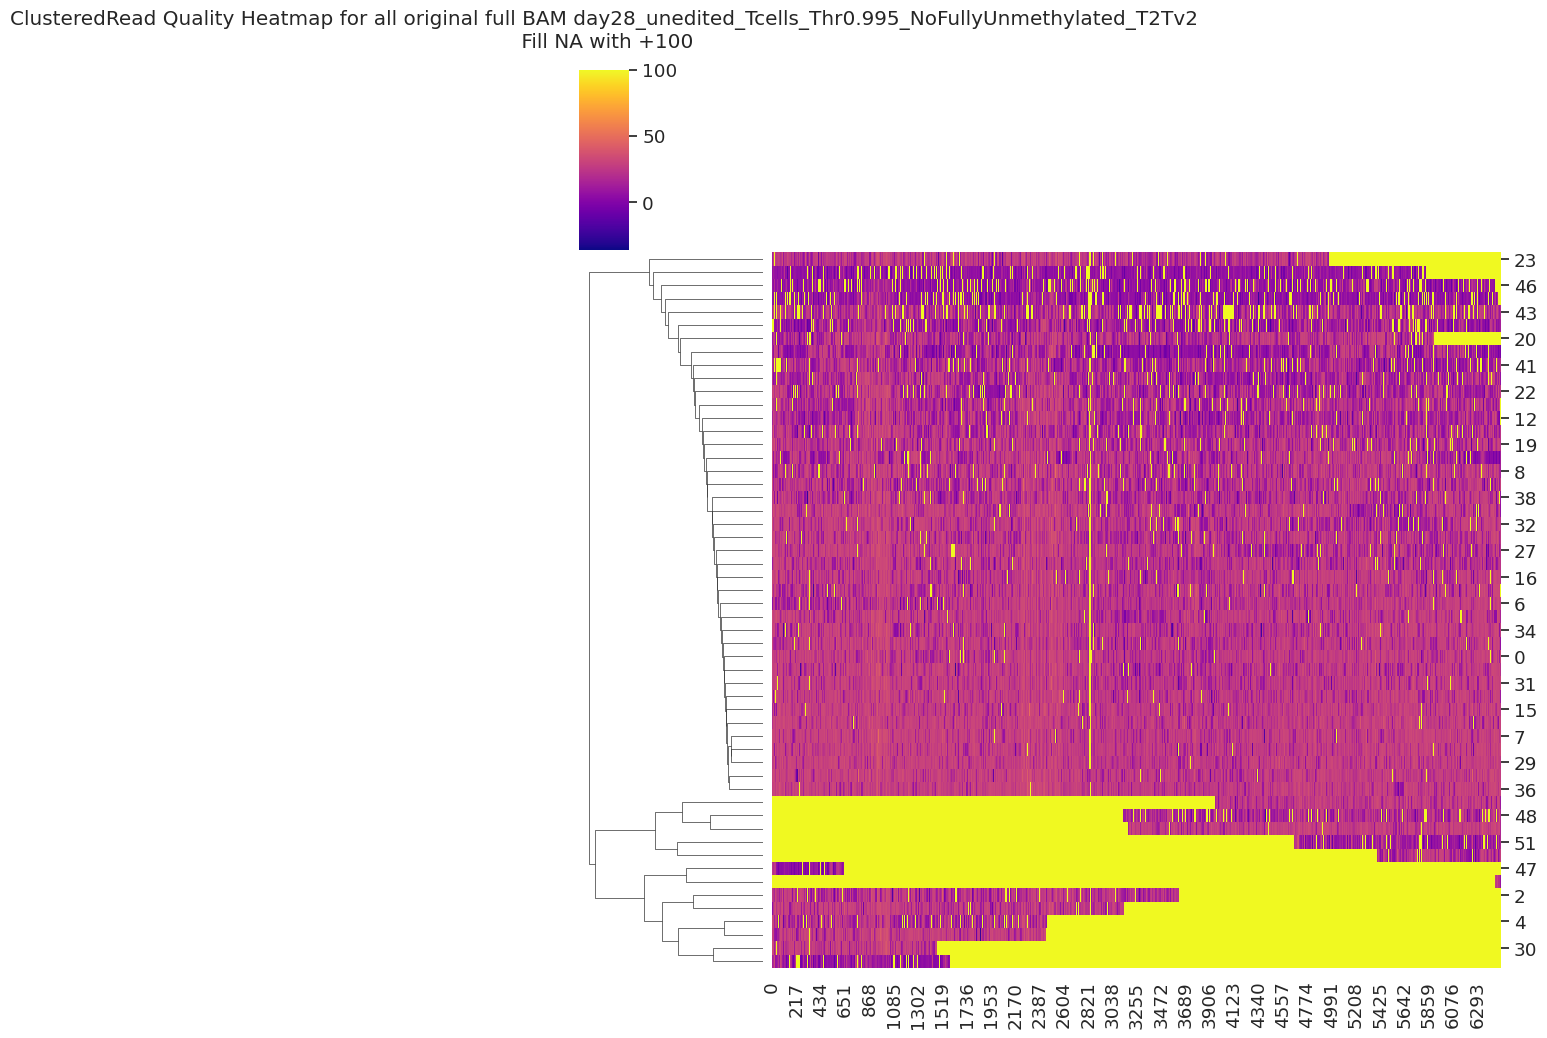

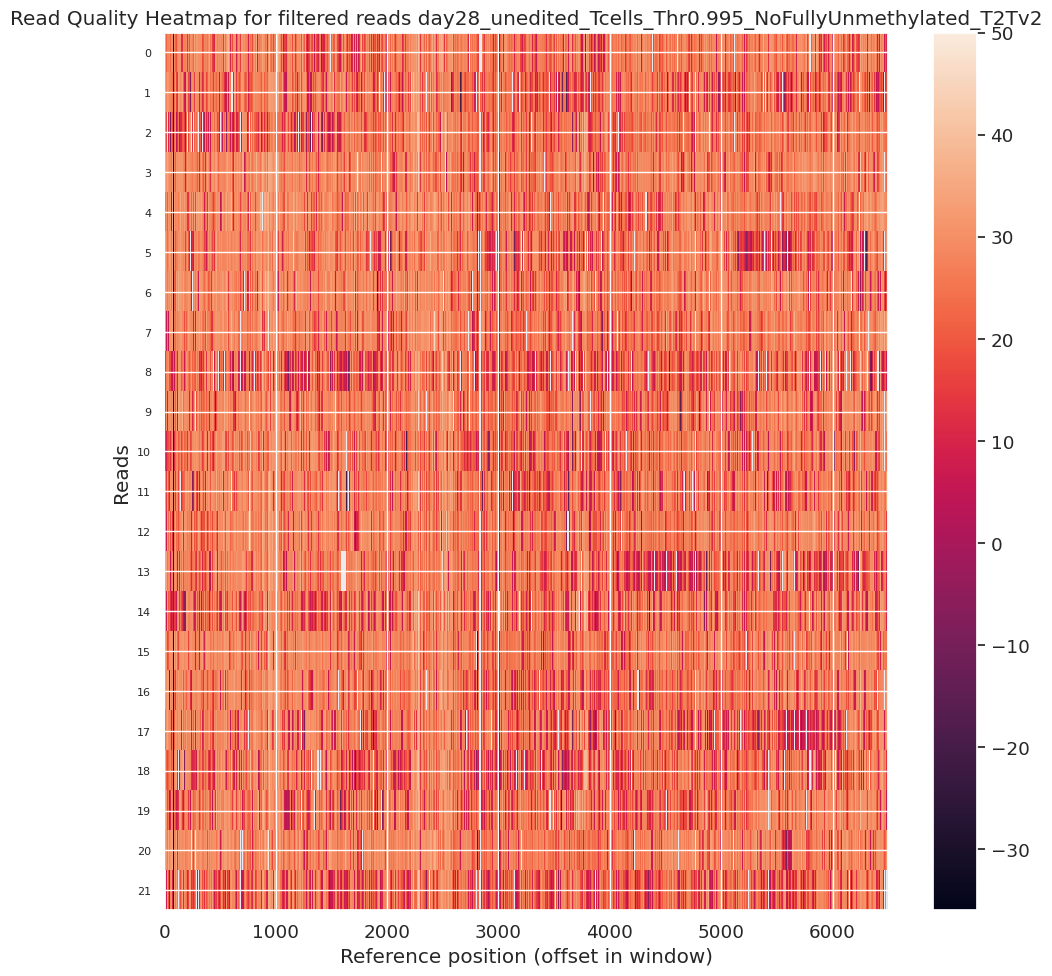

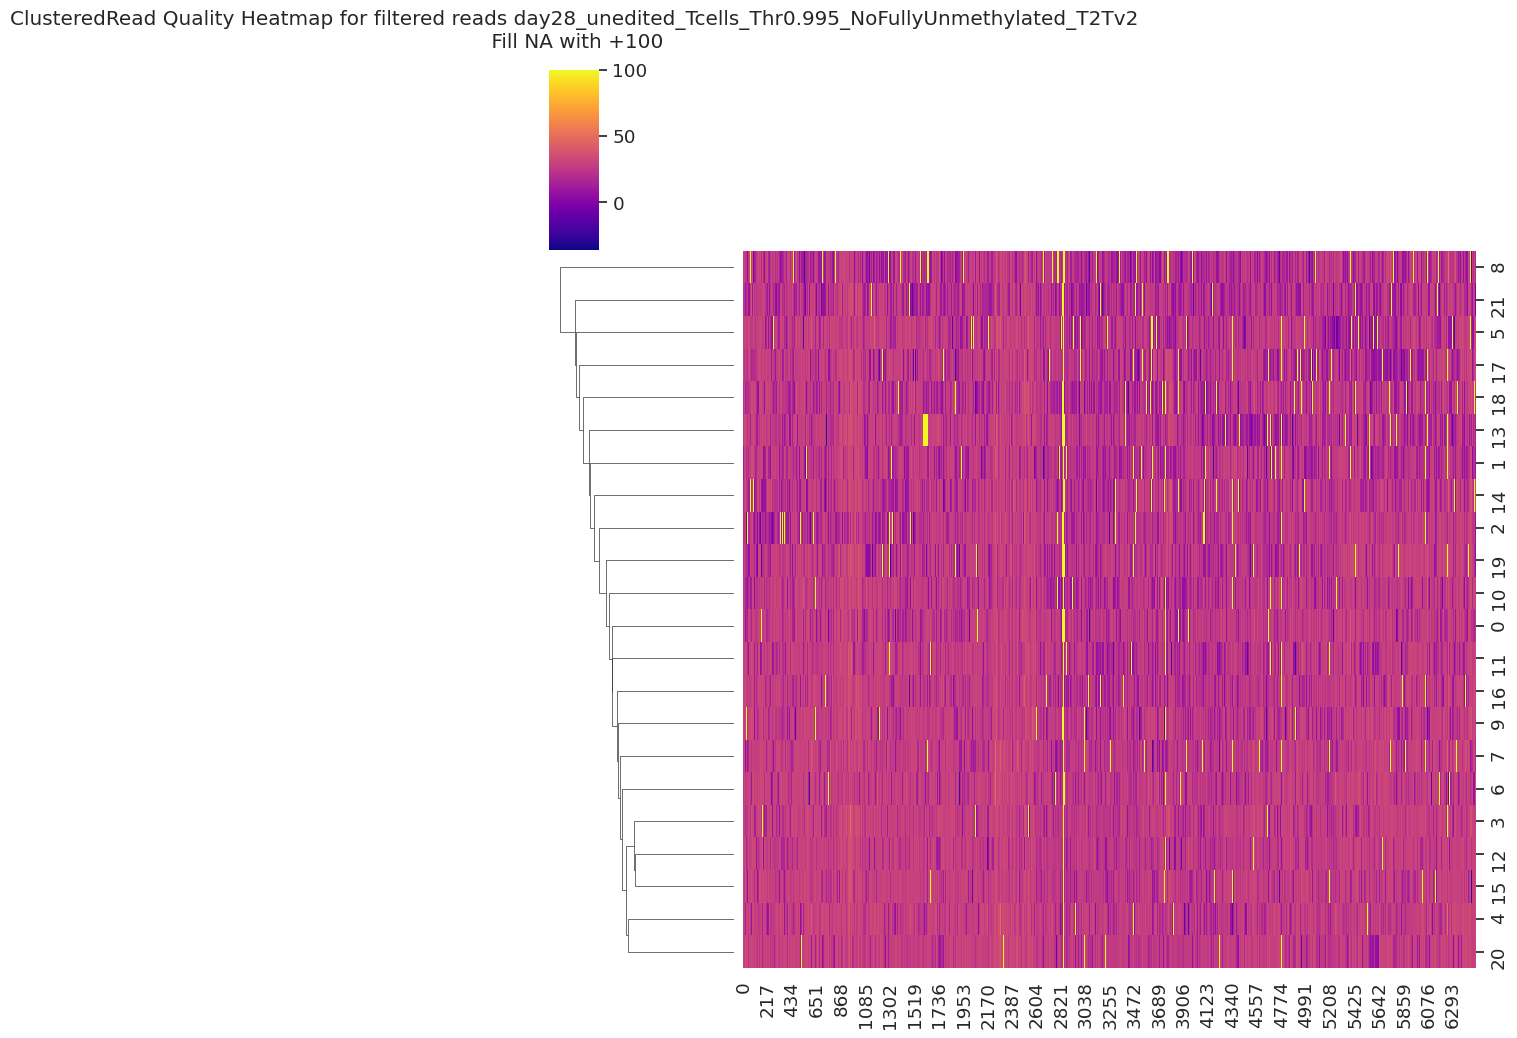

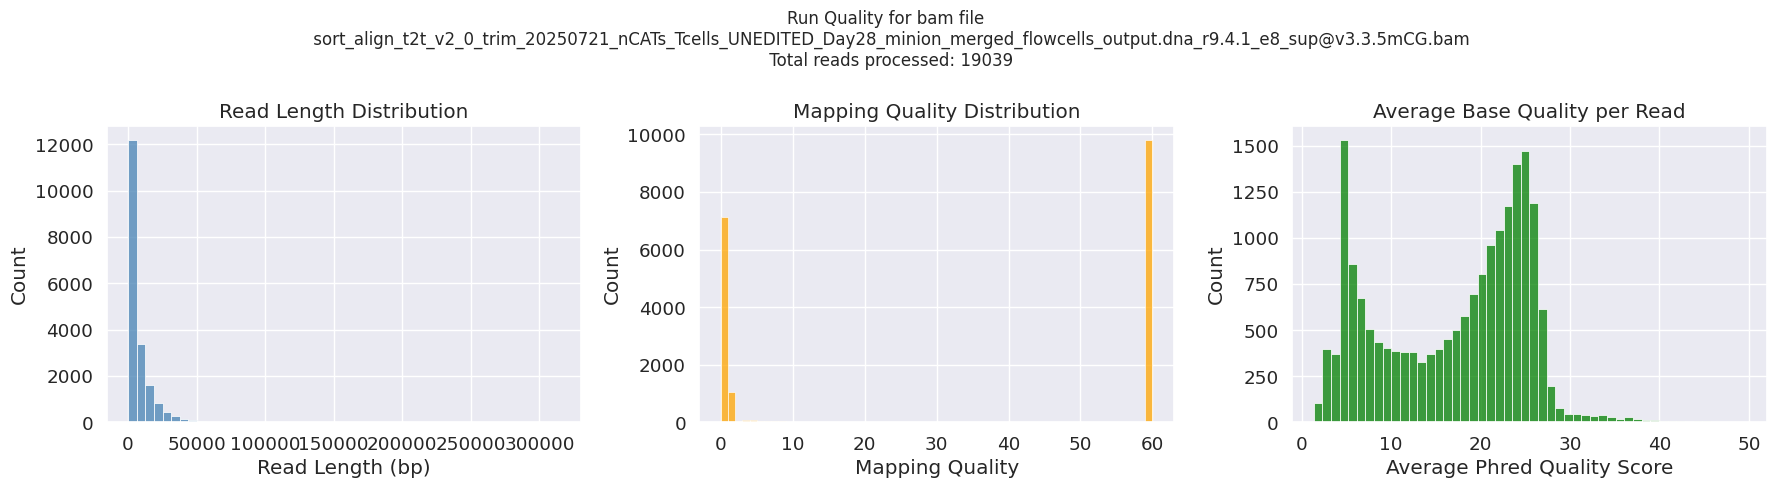

Total reads processed: 19039


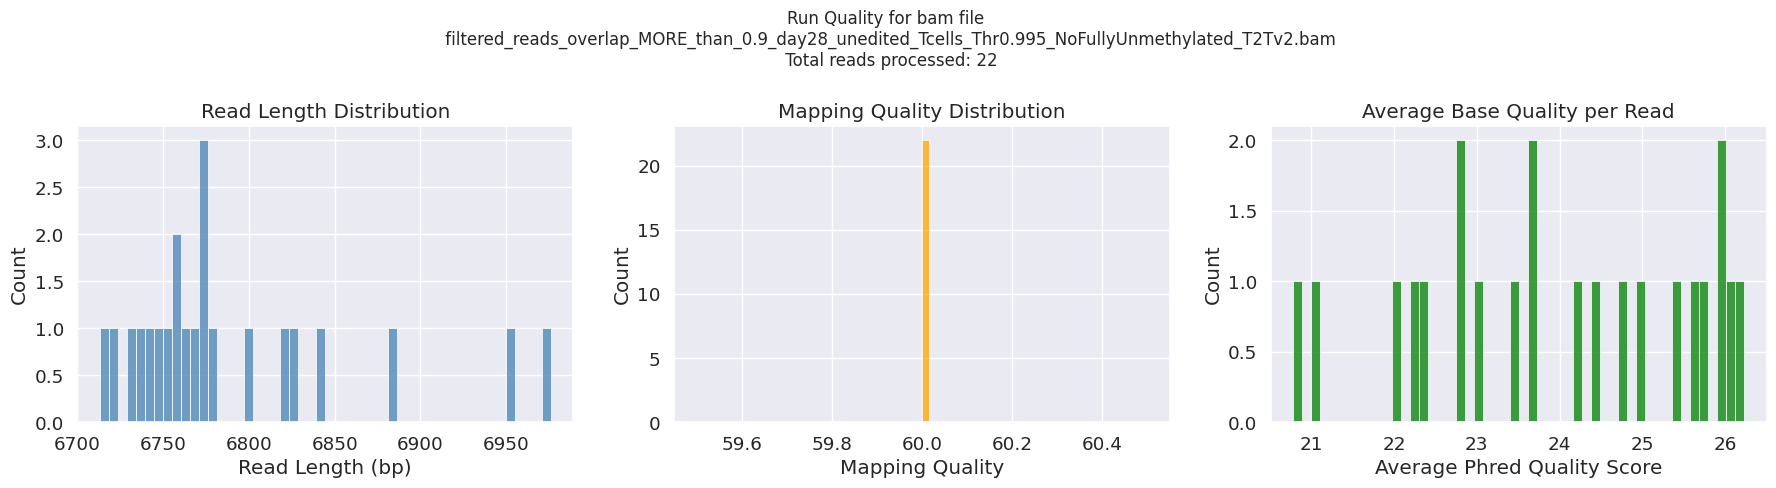

Total reads processed: 22


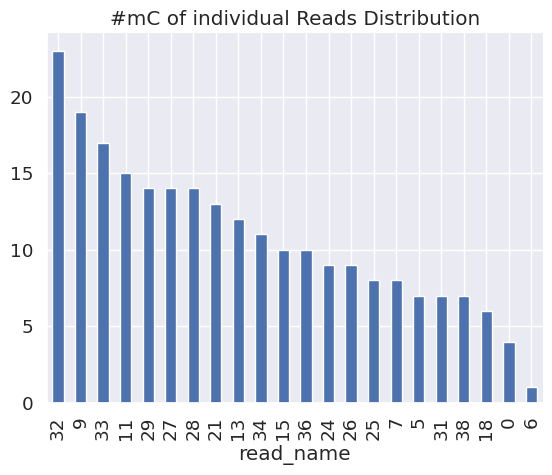

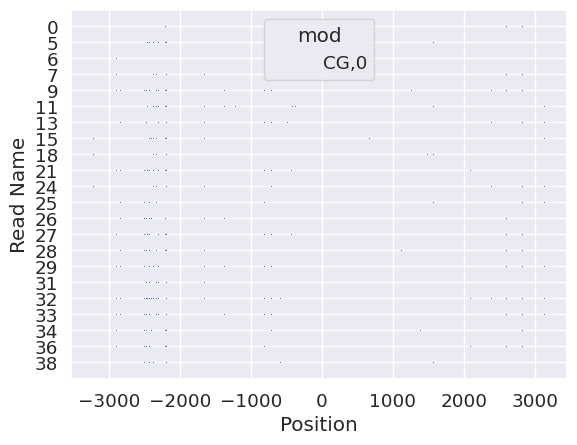

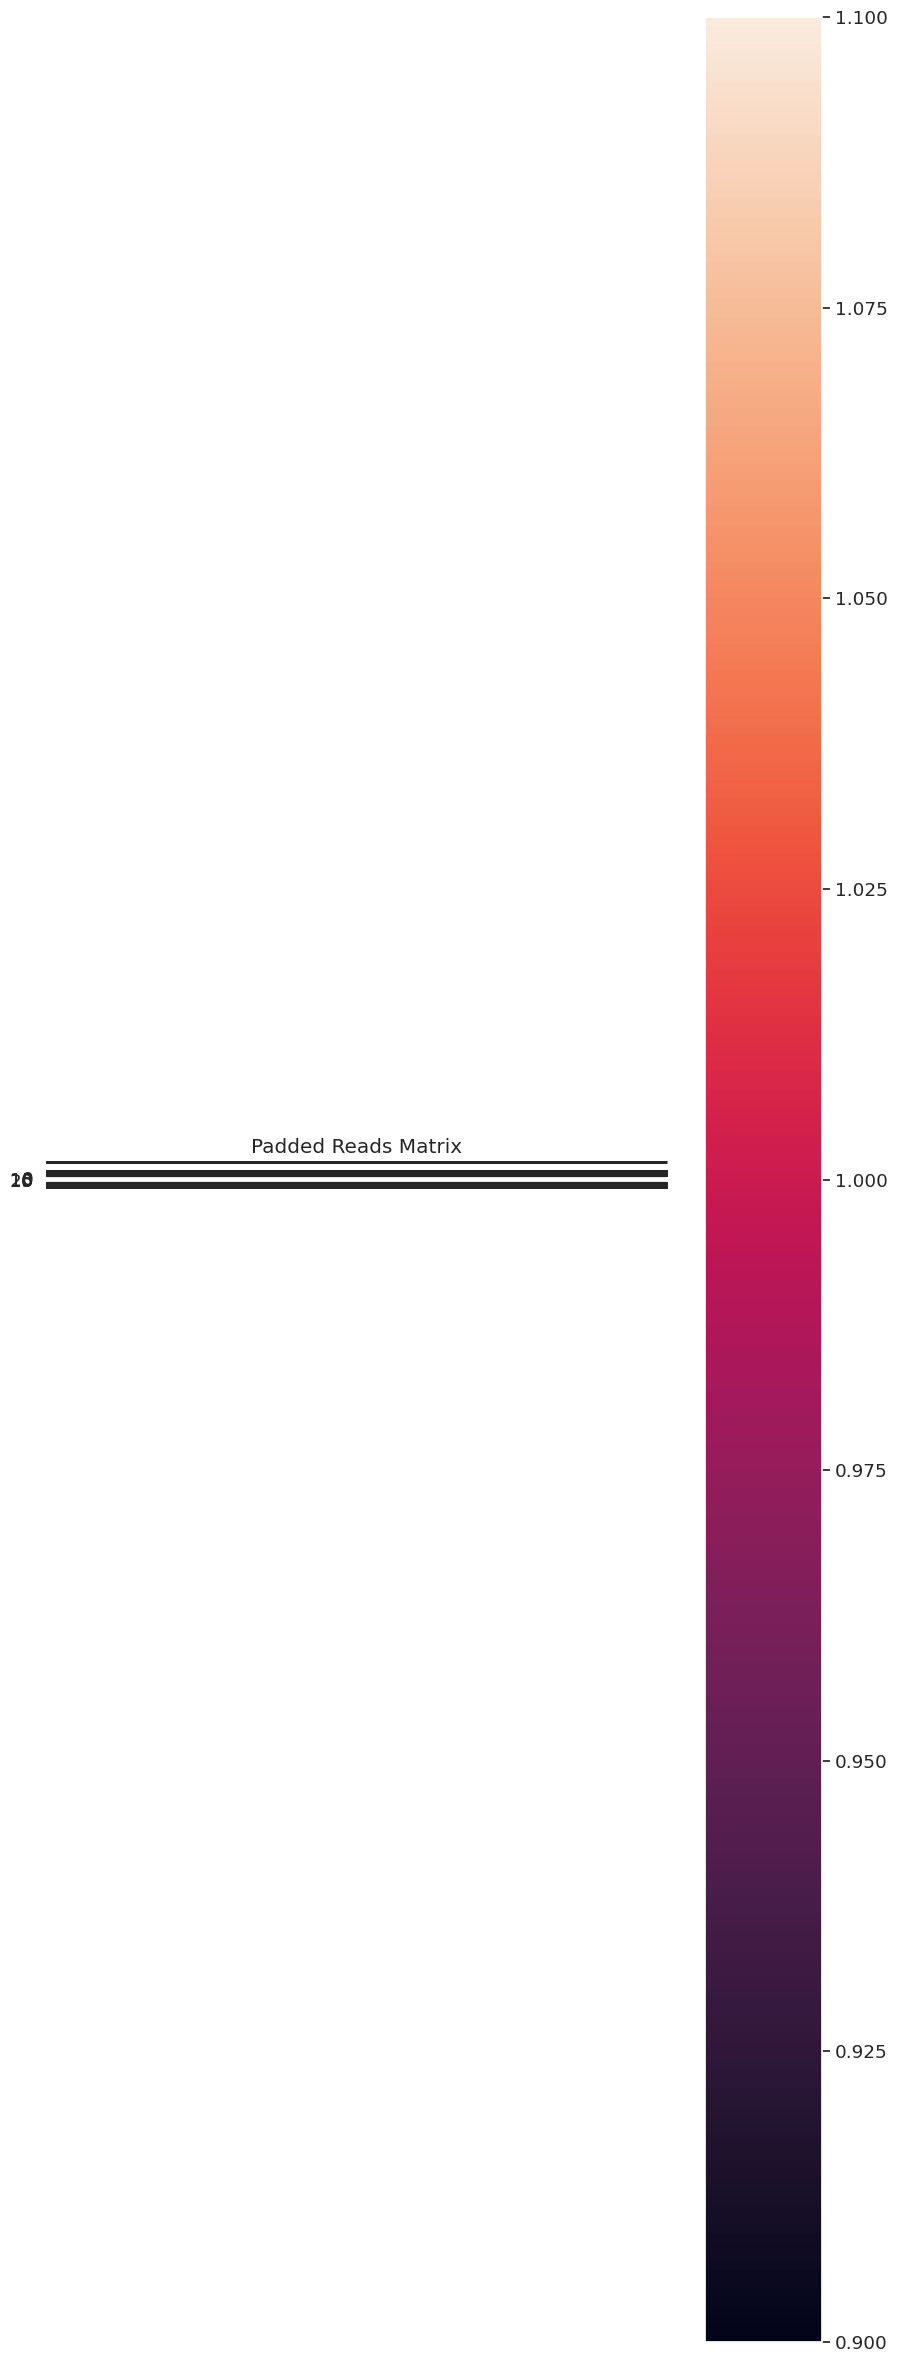

Padded reads saved to padded_reads_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-07.npy
Padded reads loaded successfully.


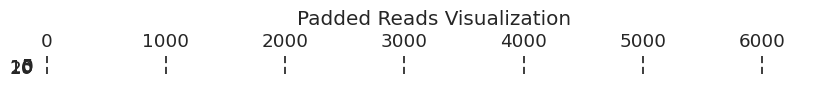

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

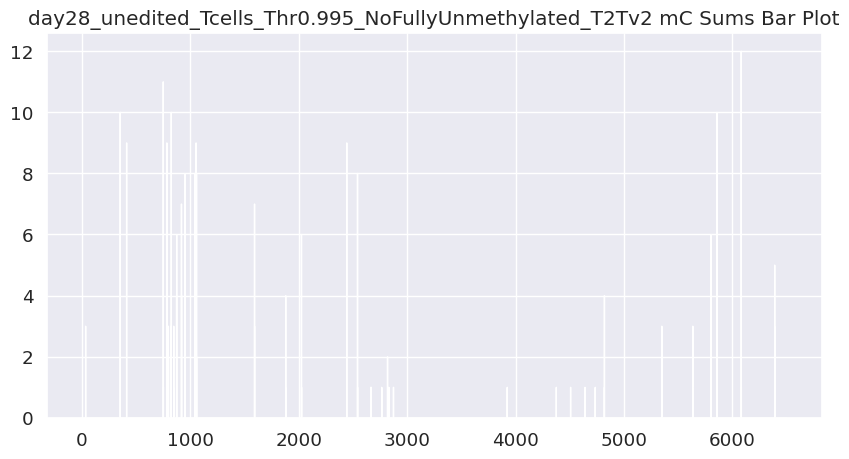

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


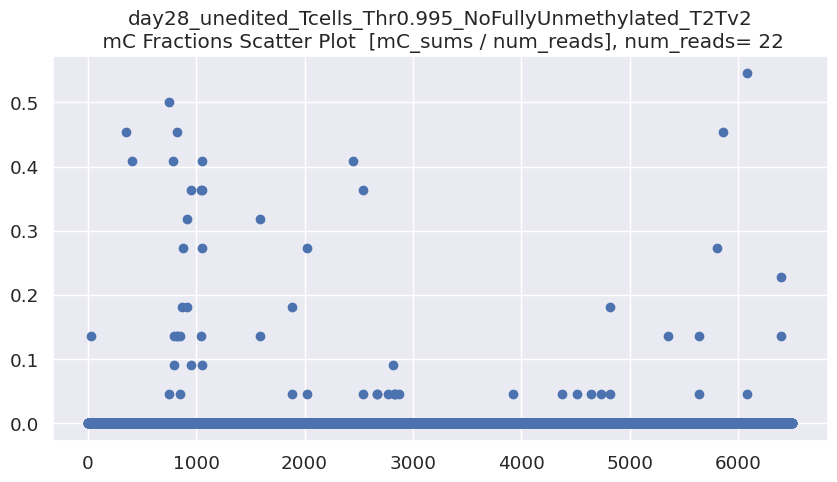

len(CGs_all) = 22
CGs_all.shape = (22, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


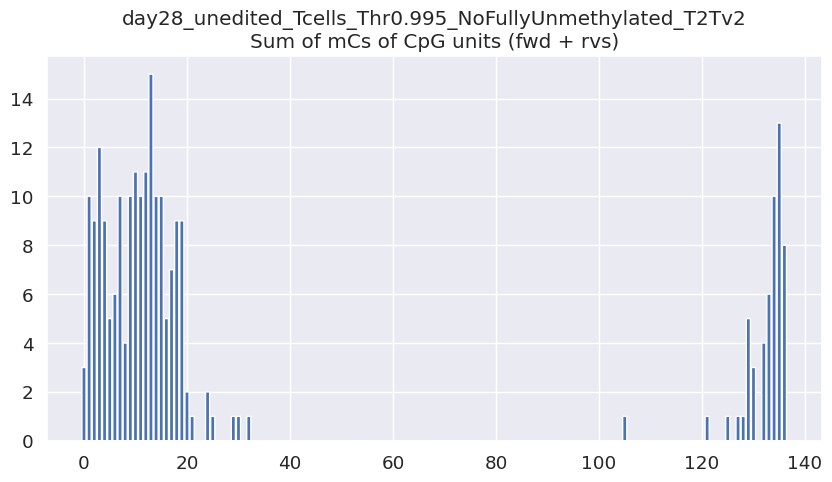

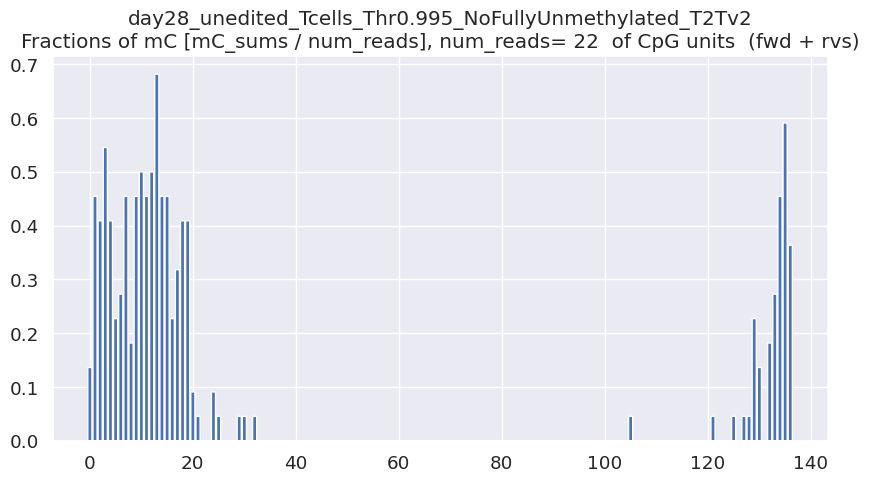

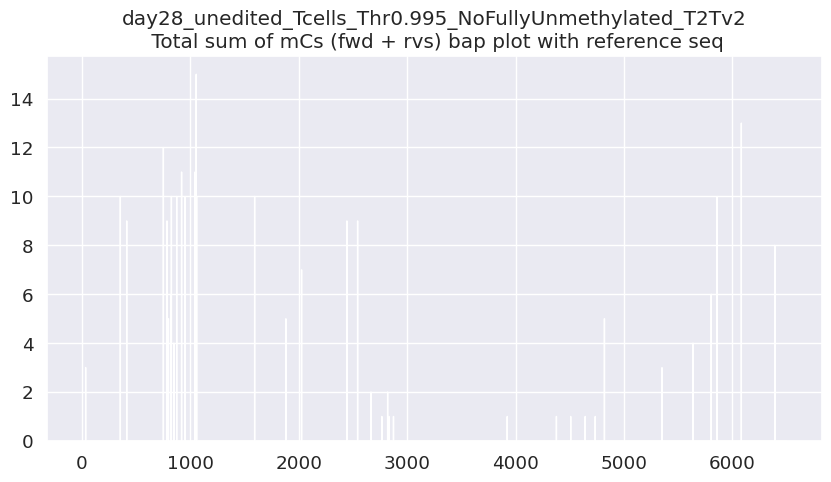

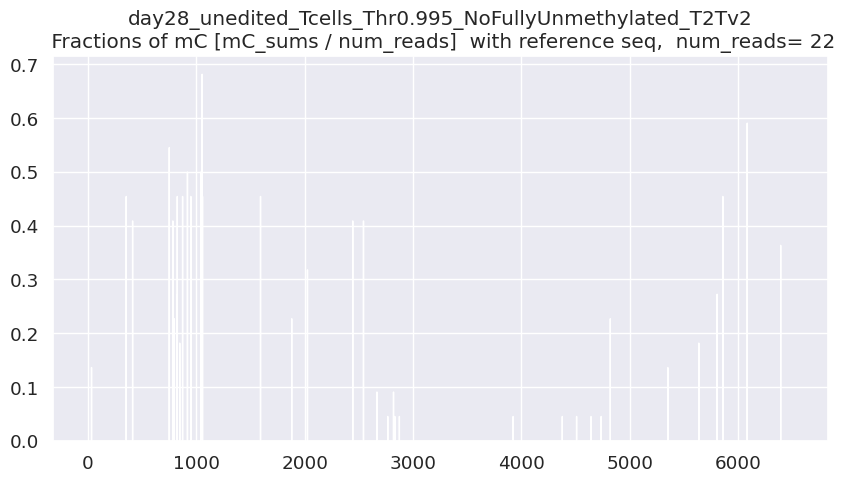

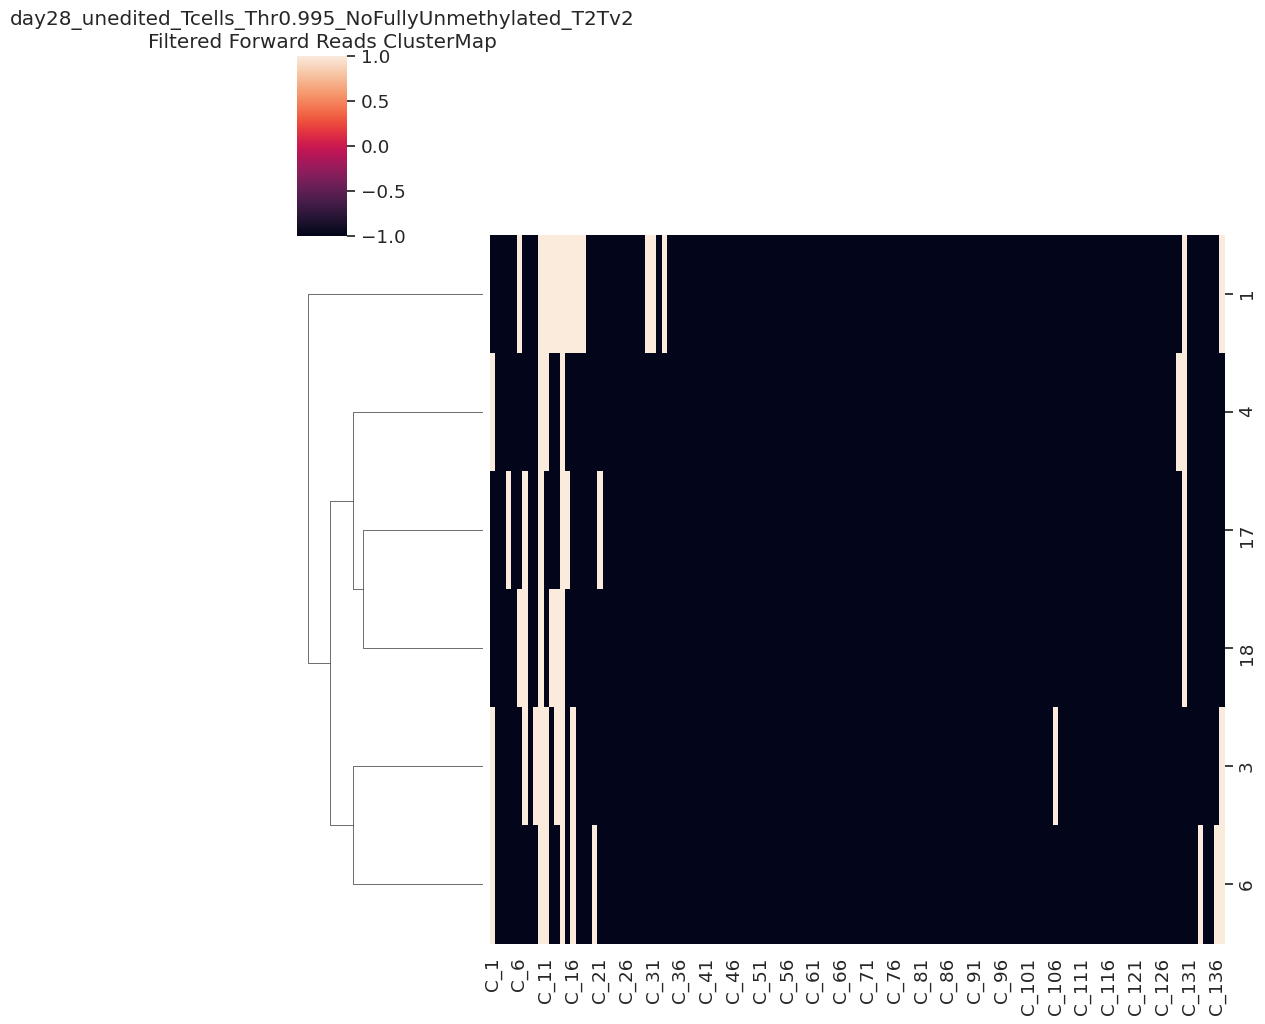

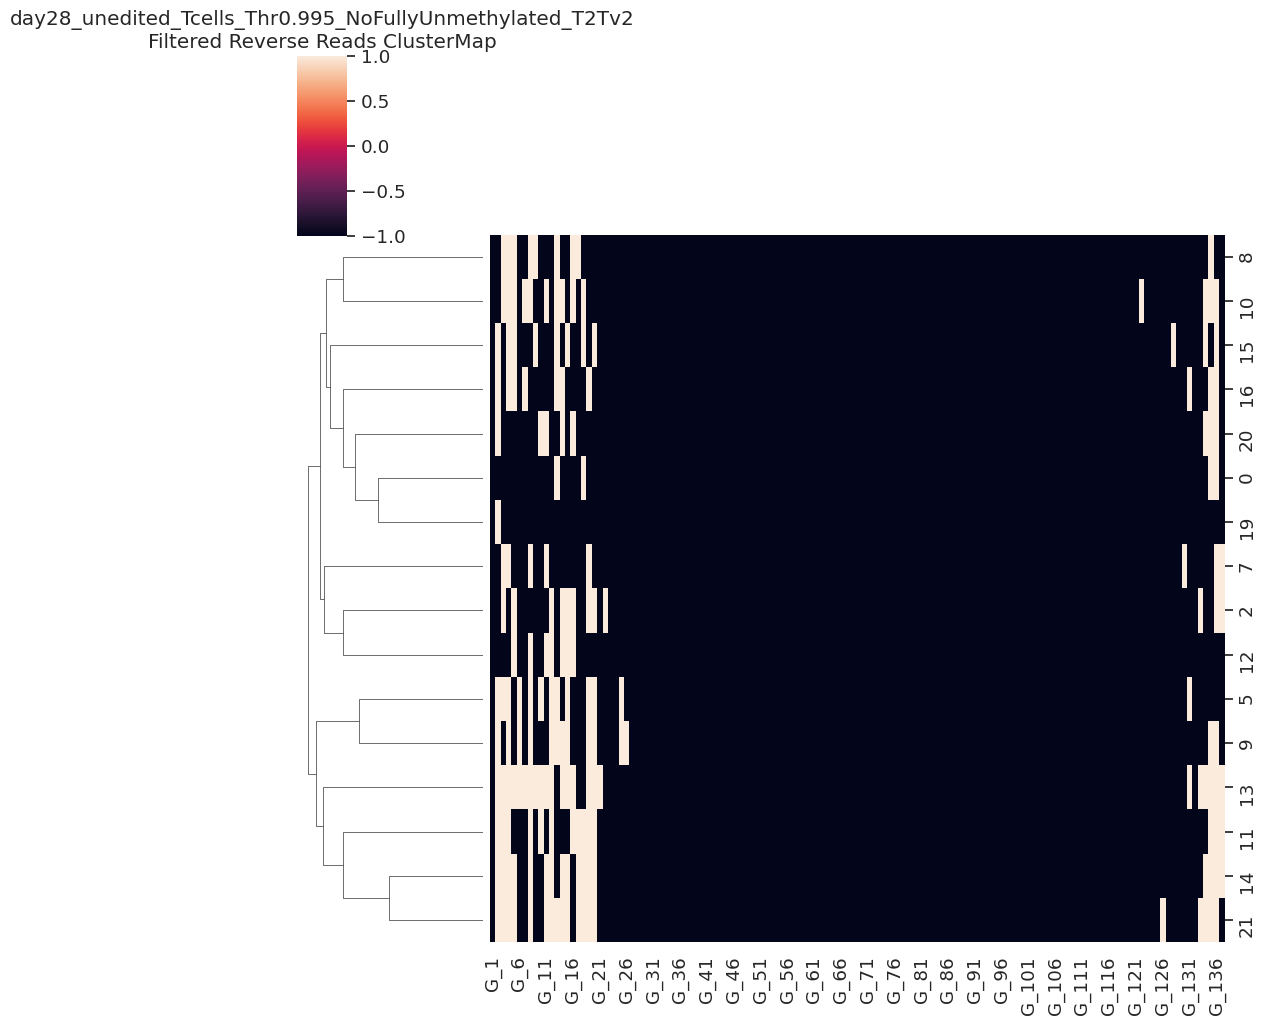

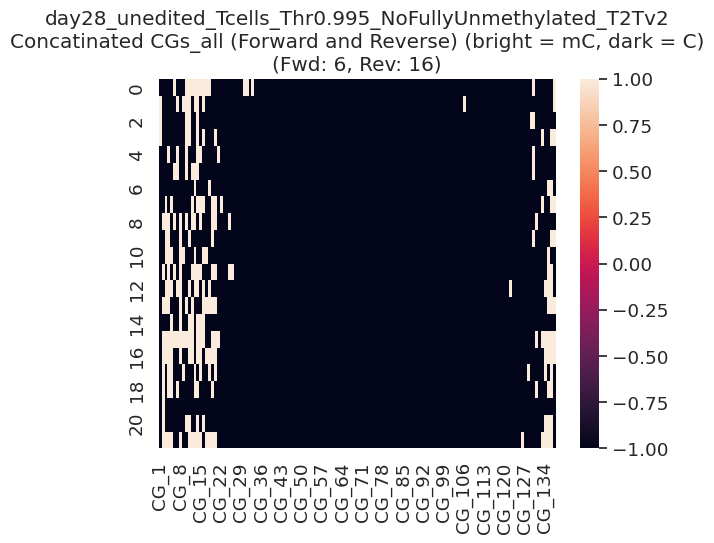

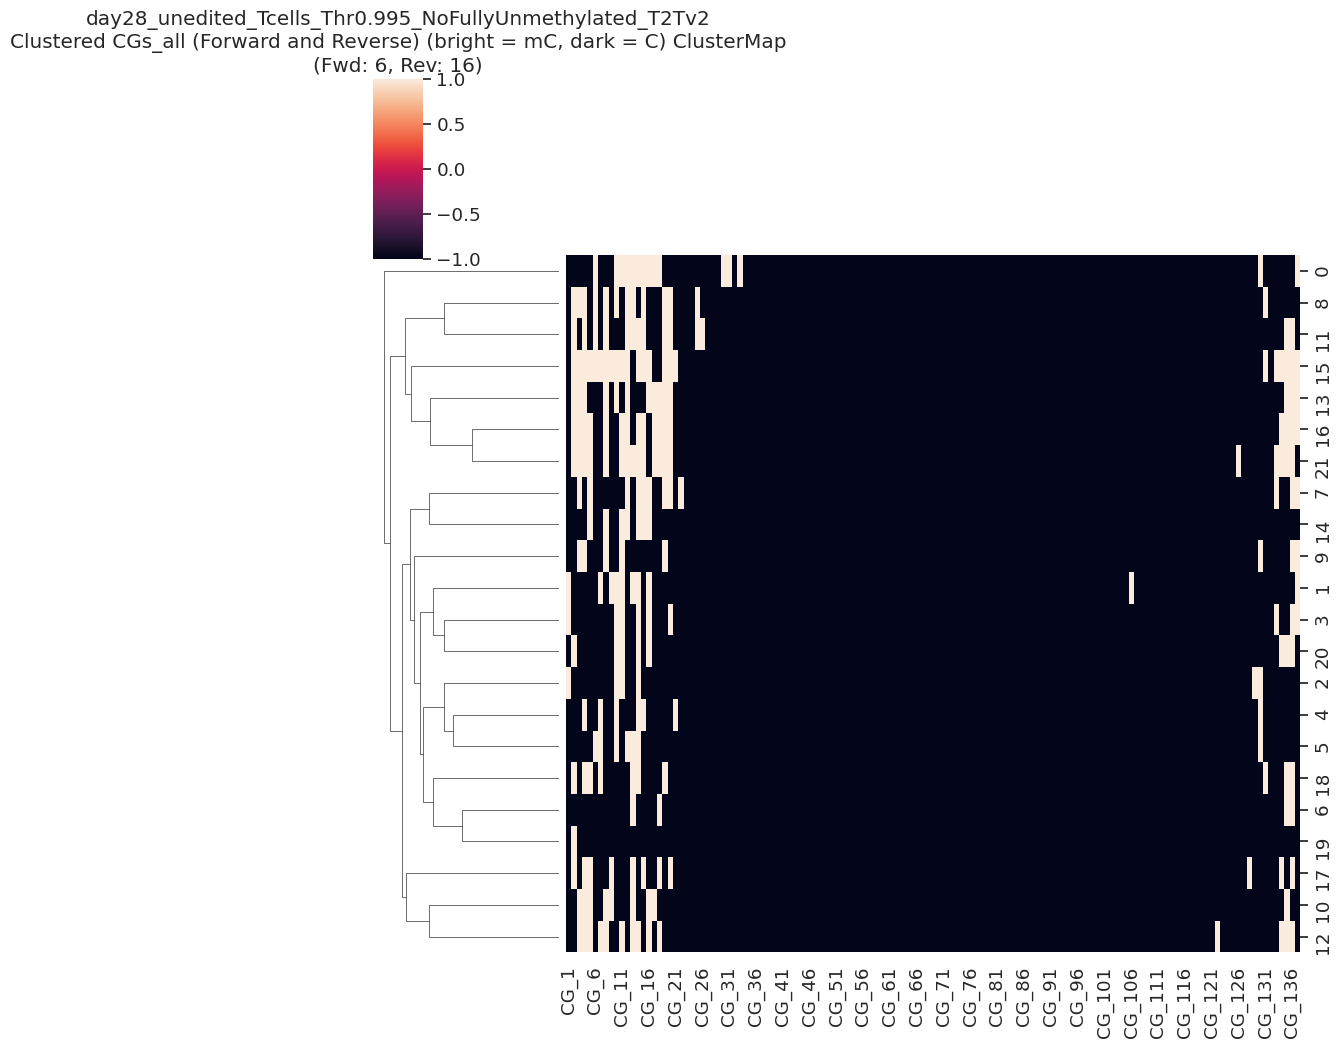

CGs_all saved as CG_137_padded_reads_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-07_units_combined_numFWD6_numRVS16.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [12]:
threshold_mC = 0.995 #0.7 #  0.9 #0.99

max_reads_plot = 3000

threshold_mapping_qualities=60 
threshold_avg_base_qualities=20

threshold_fraction_overlap_aligned = 0.9 # 0.1
threshold_fraction_mismatches = 0.7 # 0.5
# indel_fraction_threshold = 1  # 0.8
# non_fraction_threshold   = 1

experiment_name = "day"+str(day_num)+"_unedited_Tcells_Thr"+str(threshold_mC)+"_NoFullyUnmethylated_T2Tv2"

bam_path = original_bam_path #  unedit_bam_path

print('experiment_name = ', experiment_name)

save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

extract_file, extract_regions = extract_from_bam(
    experiment_name = experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    region=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
keep_full_coverage_reads_only=True

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, bam_path, region_str, 
        motifs, ref_seq_list, ref_genome_path=ref_genome_path, 
        experiment_name=experiment_name, output_dir=output_dir, 
        keep_full_coverage_reads_only=keep_full_coverage_reads_only,
        threshold_fraction_overlap_aligned=threshold_fraction_overlap_aligned,
        threshold_fraction_mismatches=threshold_fraction_mismatches,
        threshold_mapping_qualities=threshold_mapping_qualities, 
        threshold_avg_base_qualities=threshold_avg_base_qualities,
        max_reads_plot=max_reads_plot)
        # indel_fraction_threshold=indel_fraction_threshold, 
        # non_fraction_threshold=non_fraction_threshold)
        
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


# Threshold 80%*mean(mC in alll reads)

In [13]:
threshold_percent = 80
filtered_reads_df, methylation_counts, remove_reads_df = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

Mean methylated CGs per read: 10.0
Maximum methylated CGs per read: 23.0
Threshold (80% of max): 8.00
Original number of reads: 22
Number of reads after filtering: 16
Removed 6 reads


read_name_str read_name read_id_number   mod  \
12   3f1d2bb8-c289-4373-ba2c-4611fcc8c776         7              7  CG,0   
13   3f1d2bb8-c289-4373-ba2c-4611fcc8c776         7              7  CG,0   
14   3f1d2bb8-c289-4373-ba2c-4611fcc8c776         7              7  CG,0   
15   3f1d2bb8-c289-4373-ba2c-4611fcc8c776         7              7  CG,0   
16   3f1d2bb8-c289-4373-ba2c-4611fcc8c776         7              7  CG,0   
..                                    ...       ...            ...   ...   
240  8787eb03-0f81-420d-abea-d44981f9f3fe        36             36  CG,0   
241  8787eb03-0f81-420d-abea-d44981f9f3fe        36             36  CG,0   
242  8787eb03-0f81-420d-abea-d44981f9f3fe        36             36  CG,0   
243  8787eb03-0f81-420d-abea-d44981f9f3fe        36             36  CG,0   
244  8787eb03-0f81-420d-abea-d44981f9f3fe        36             36  CG,0   

      pos  read_lengths  mapping_qualities  avg_base_qualities  \
12  -2897          6976                 60           26.014048   
13  -2377          6976                 60           26.014048   
14  -2332          6976                 60           26.014048   
15  -2197          6976                 60           26.014048   
16  -1658          6976                 60           26.014048   
..    ...           ...                ...                 ...   
240 -2197          6757                 60           26.232500   
241  -807          6757                 60           26.232500   
242  2100          6757                 60           26.232500   
243  2608          6757                 60           26.232500   
244  2832          6757                 60           26.232500   

     num_overlap_aligned_bases  fraction_overlap_aligned  num_nones  \
12                        6431                  0.989385         72   
13                        6431                  0.989385         72   
14                        6431                  0.989385         72   
15                        6431                  0.989385         72   
16                        6431                  0.989385         72   
..                         ...                       ...        ...   
240                       6434                  0.989846         68   
241                       6434                  0.989846         68   
242                       6434                  0.989846         68   
243                       6434                  0.989846         68   
244                       6434                  0.989846         68   

     fraction_nones  num_inserts  fraction_inserts  num_mismatches  \
12         0.010321          100          0.014335              27   
13         0.010321          100          0.014335              27   
14         0.010321          100          0.014335              27   
15         0.010321          100          0.014335              27   
16         0.010321          100          0.014335              27   
..              ...          ...               ...             ...   
240        0.010064           46          0.006808              31   
241        0.010064           46          0.006808              31   
242        0.010064           46          0.006808              31   
243        0.010064           46          0.006808              31   
244        0.010064           46          0.006808              31   

     fraction_mismatches  num_ambiguous  pos_shifted  num_CG_methylated  
12              0.003870              0          353                1.0  
13              0.003870              0          873                1.0  
14              0.003870              0          918                1.0  
15              0.003870              0         1053                1.0  
16              0.003870              0         1592                1.0  
..                   ...            ...          ...                ...  
240             0.004588              0         1053                1.0  
241             0.004588            

In [14]:
remove_reads_df

read_name_str read_name read_id_number   mod  \
0    cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
1    cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
2    cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
3    cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
4    6c2e1011-3c7f-46a8-8669-57e7c9de0953         5              5  CG,0   
5    6c2e1011-3c7f-46a8-8669-57e7c9de0953         5              5  CG,0   
6    6c2e1011-3c7f-46a8-8669-57e7c9de0953         5              5  CG,0   
7    6c2e1011-3c7f-46a8-8669-57e7c9de0953         5              5  CG,0   
8    6c2e1011-3c7f-46a8-8669-57e7c9de0953         5              5  CG,0   
9    6c2e1011-3c7f-46a8-8669-57e7c9de0953         5              5  CG,0   
10   6c2e1011-3c7f-46a8-8669-57e7c9de0953         5              5  CG,0   
11   44c32adc-5f73-4b85-95eb-e4caa5173cf8         6              6  CG,0   
90   408d60f8-18c6-425f-9b16-cd9135dd56d3        18             18  CG,0   
91   408d60f8-18c6-425f-9b16-cd9135dd56d3        18             18  CG,0   
92   408d60f8-18c6-425f-9b16-cd9135dd56d3        18             18  CG,0   
93   408d60f8-18c6-425f-9b16-cd9135dd56d3        18             18  CG,0   
94   408d60f8-18c6-425f-9b16-cd9135dd56d3        18             18  CG,0   
95   408d60f8-18c6-425f-9b16-cd9135dd56d3        18             18  CG,0   
177  b9a8a8c1-8728-49ef-ac63-a04d2edee3c2        31             31  CG,0   
178  b9a8a8c1-8728-49ef-ac63-a04d2edee3c2        31             31  CG,0   
179  b9a8a8c1-8728-49ef-ac63-a04d2edee3c2        31             31  CG,0   
180  b9a8a8c1-8728-49ef-ac63-a04d2edee3c2        31             31  CG,0   
181  b9a8a8c1-8728-49ef-ac63-a04d2edee3c2        31             31  CG,0   
182  b9a8a8c1-8728-49ef-ac63-a04d2edee3c2        31             31  CG,0   
183  b9a8a8c1-8728-49ef-ac63-a04d2edee3c2        31             31  CG,0   
257  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   
258  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   
259  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   
260  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   
261  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   
262  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   
263  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   

      pos  read_lengths  mapping_qualities  avg_base_qualities  \
0   -2209          6749                 60           24.754630   
1   -1225          6749                 60           24.754630   
2    2608          6749                 60           24.754630   
3    2832          6749                 60           24.754630   
4   -2452          6779                 60           22.085706   
5   -2427          6779                 60           22.085706   
6   -2376          6779                 60           22.085706   
7   -2299          6779                 60           22.085706   
8   -2208          6779                 60           22.085706   
9   -2196          6779                 60           22.085706   
10   1570          6779                 60           22.085706   
11  -2897          6763                 60           23.058406   
90  -3216          6828                 60           20.780609   
91  -2376          6828                 60           20.780609   
92  -2331          6828                 60           20.780609   
93  -2196          6828                 60           20.780609   
94   1485          6828                 60           20.780609   
95   1570          6828                 60           20.780609   
177 -2467          6954                 60           24.427811   
178 -2426          6954                 60           24.427811   
179 -2332          6954                 60           24.427811   
180 -2300          6954                 60           24.427811   
1

In [15]:
bam_path

'/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

In [16]:
!pwd

/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/unedited/analyze_single_reads


In [17]:
# output_dir_path = '/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/' # "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/"
removed_reads_bam_name = "reads_with_mC_less_than_mean_x_" +  str(threshold_percent) + "_" + experiment_name +".bam"
removed_output_bam_path=Path(output_dir_path, removed_reads_bam_name)
removed_output_bam_path

PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/reads_with_mC_less_than_mean_x_80_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [18]:
subset_BAM_by_read_IDs(original_bam_path, remove_reads_df, output_bam_path=removed_output_bam_path, index_output=True)


Subset BAM written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/reads_with_mC_less_than_mean_x_80_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam
Index written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/reads_with_mC_less_than_mean_x_80_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam.bai


PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/reads_with_mC_less_than_mean_x_80_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

# Save filtered reads to BAM

In [19]:
# output_dir_path = "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/outputs"
removed_reads_bam_name = "filtered_reads_with_mC_MORE_than_mean_x_" +  str(threshold_percent) + "_" + experiment_name +".bam"
filtered_output_bam_path=Path(output_dir_path, removed_reads_bam_name)
filtered_output_bam_path

PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_80_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [20]:
subset_BAM_by_read_IDs(original_bam_path, filtered_reads_df, output_bam_path=filtered_output_bam_path, index_output=True)


Subset BAM written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_80_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam
Index written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_80_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam.bai


PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_80_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [21]:
sam_path = bam_to_sam(filtered_output_bam_path, sam_path=None)
sam_path

Converted BAM → SAM: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_80_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.sam


PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_80_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.sam')

In [22]:
# sam_path = bam_to_sam(removed_output_bam_path, sam_path=None)
# sam_path
# removed_reads_bam_path = '/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam'
# removed_reads_bam_path
# plot_bam_quality_metrics(removed_reads_bam_path)

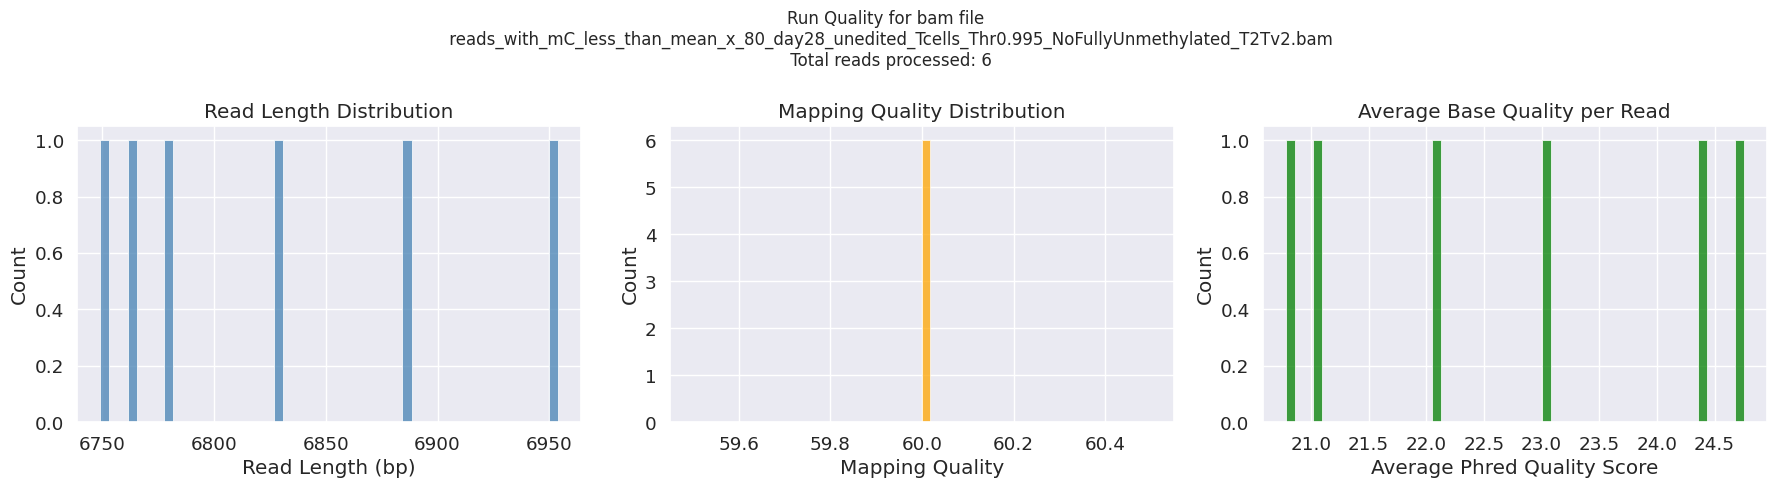

Total reads processed: 6


In [23]:

plot_bam_quality_metrics(removed_output_bam_path)

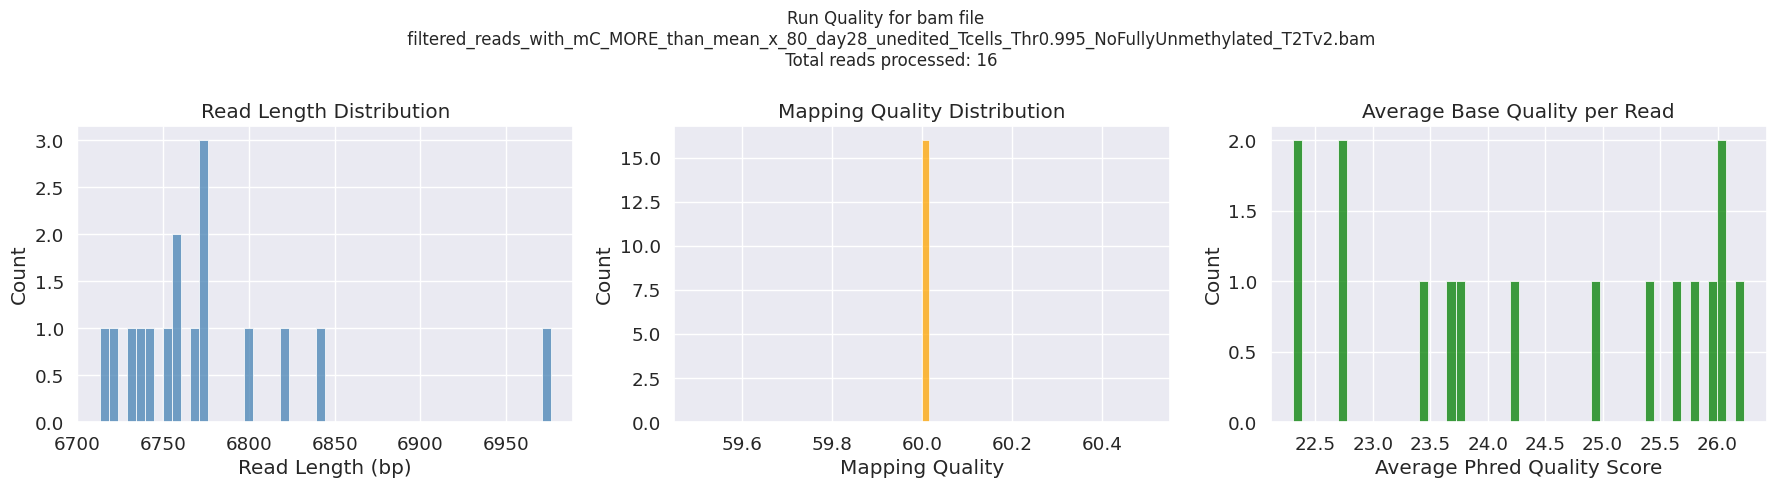

Total reads processed: 16


In [24]:
plot_bam_quality_metrics(filtered_output_bam_path)

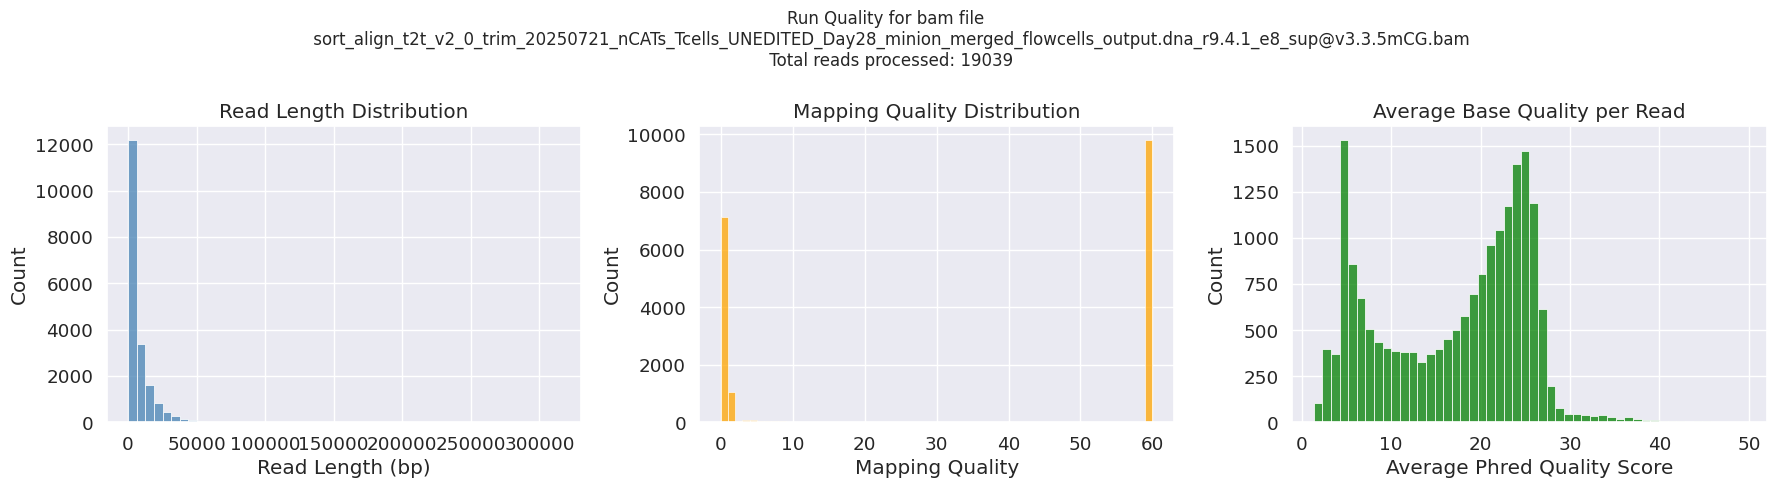

Total reads processed: 19039


In [25]:
plot_bam_quality_metrics(original_bam_path)

# Load BAM files

In [26]:
# removed_reads_bam_path= '/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam'
# removed_reads_bam_path
# plot_bam_quality_metrics(removed_reads_bam_path)

In [27]:
region_str

'chr1:206583354-206589854'

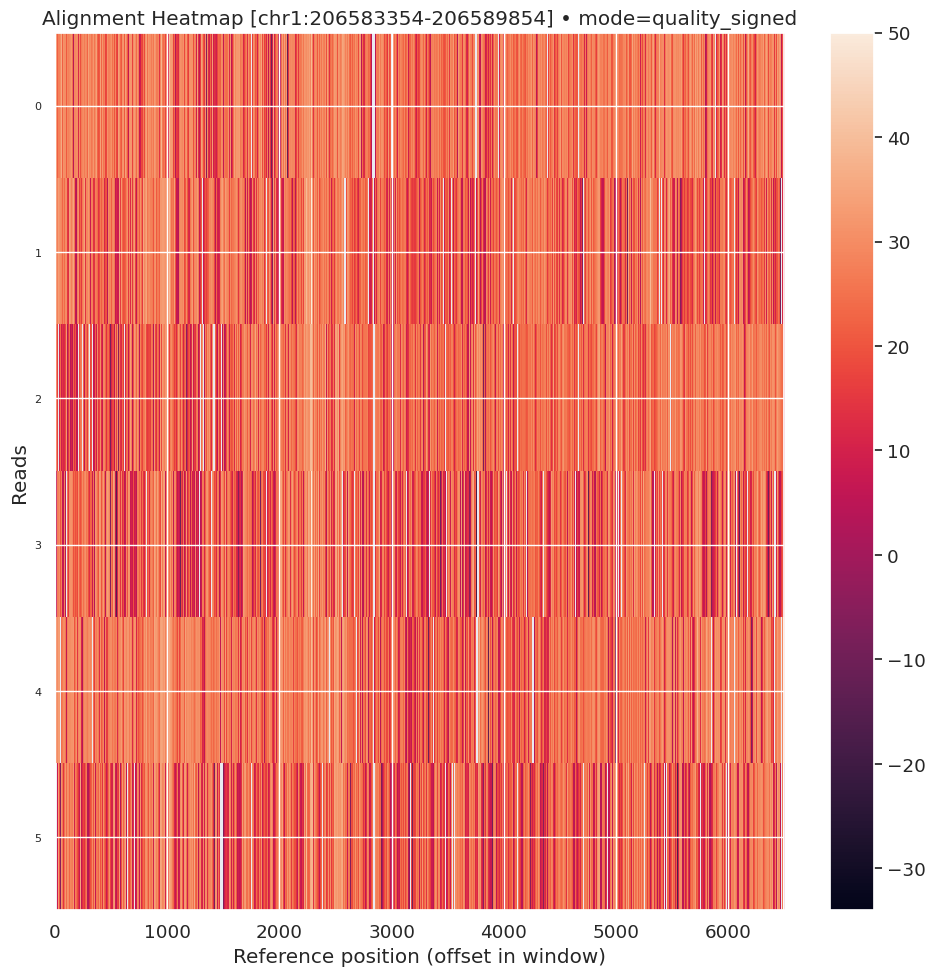

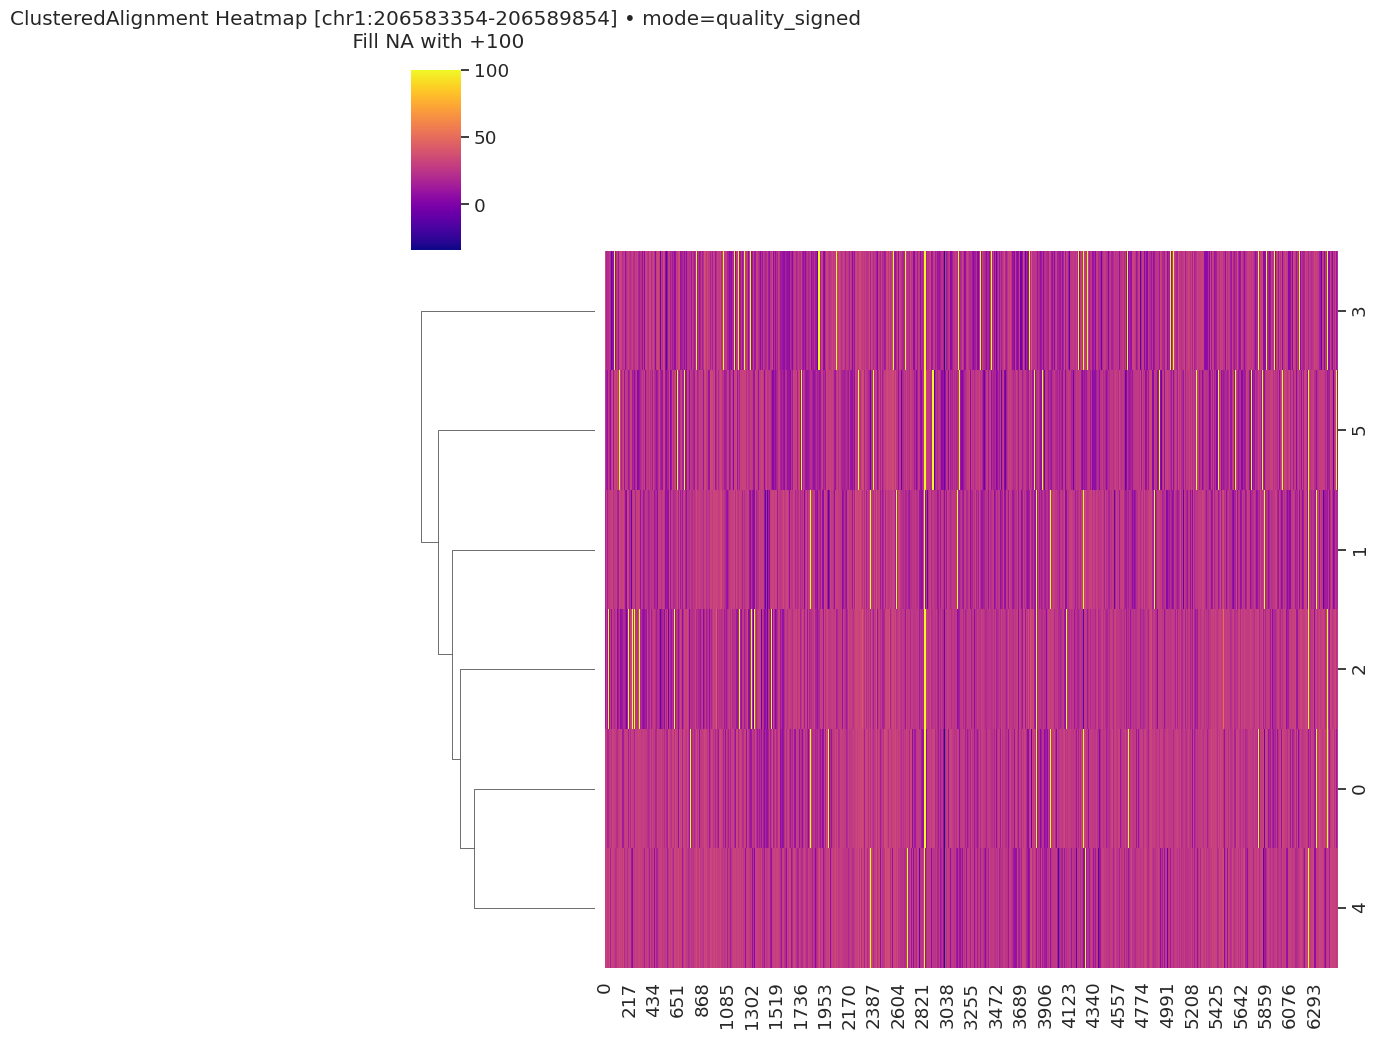

In [28]:
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams


bam = removed_output_bam_path # removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)

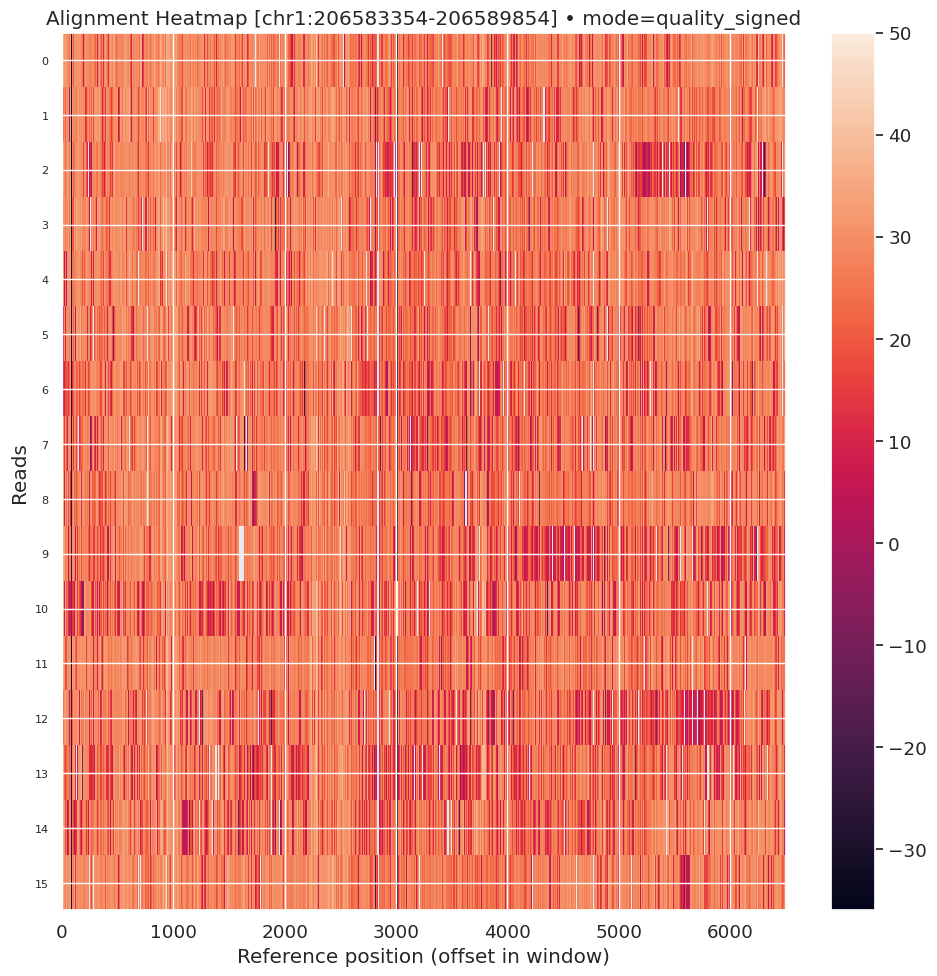

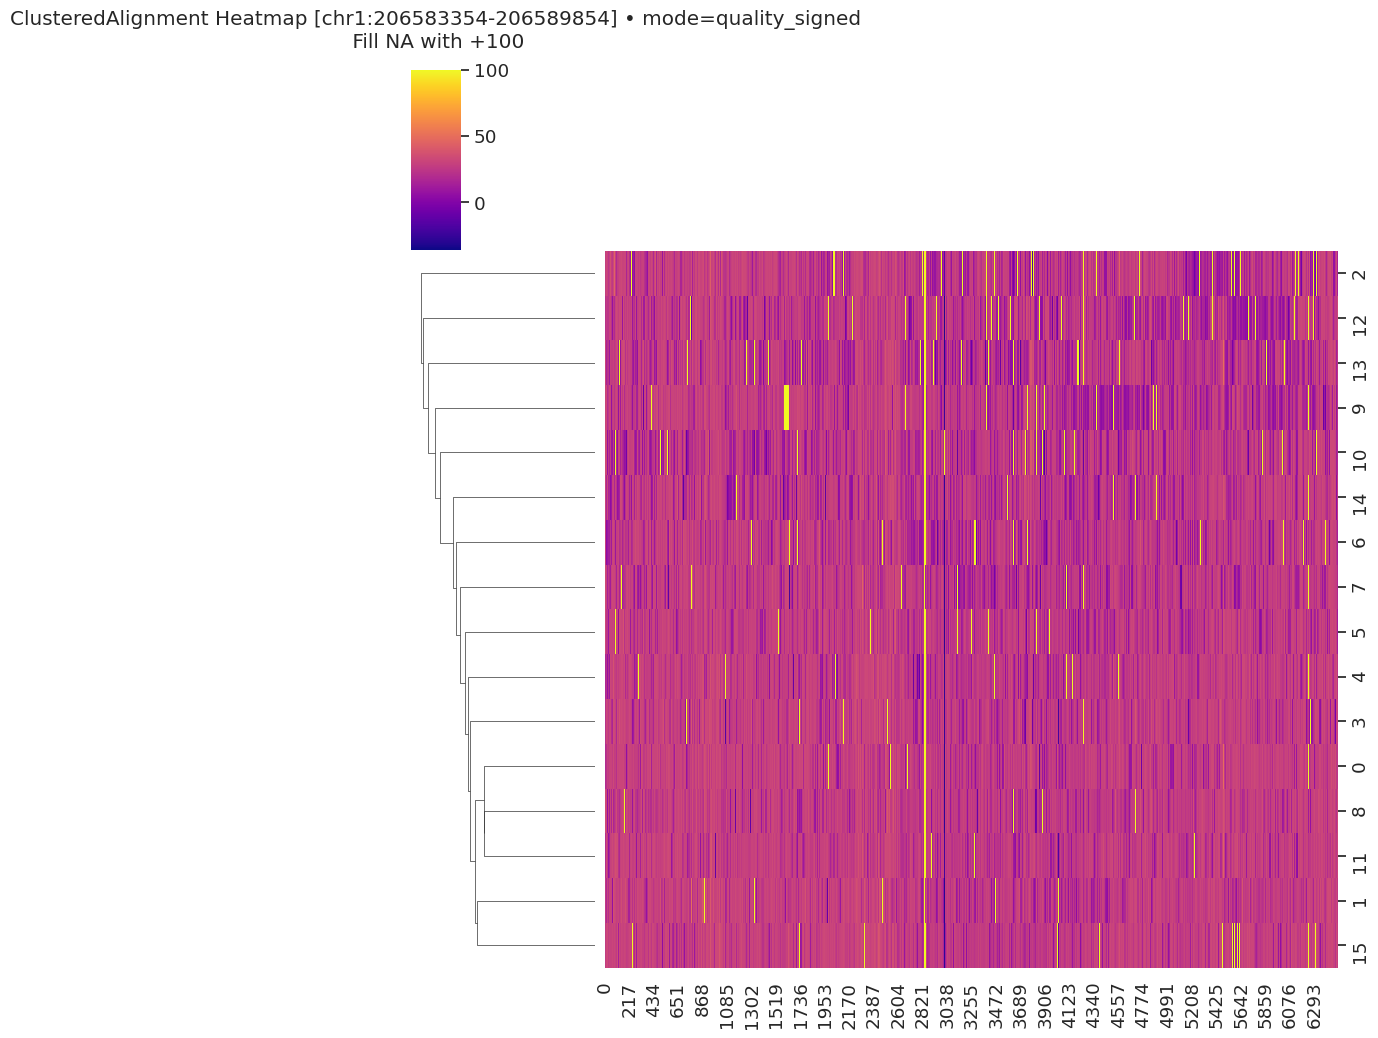

In [29]:


sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams

bam = filtered_output_bam_path  #  removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)



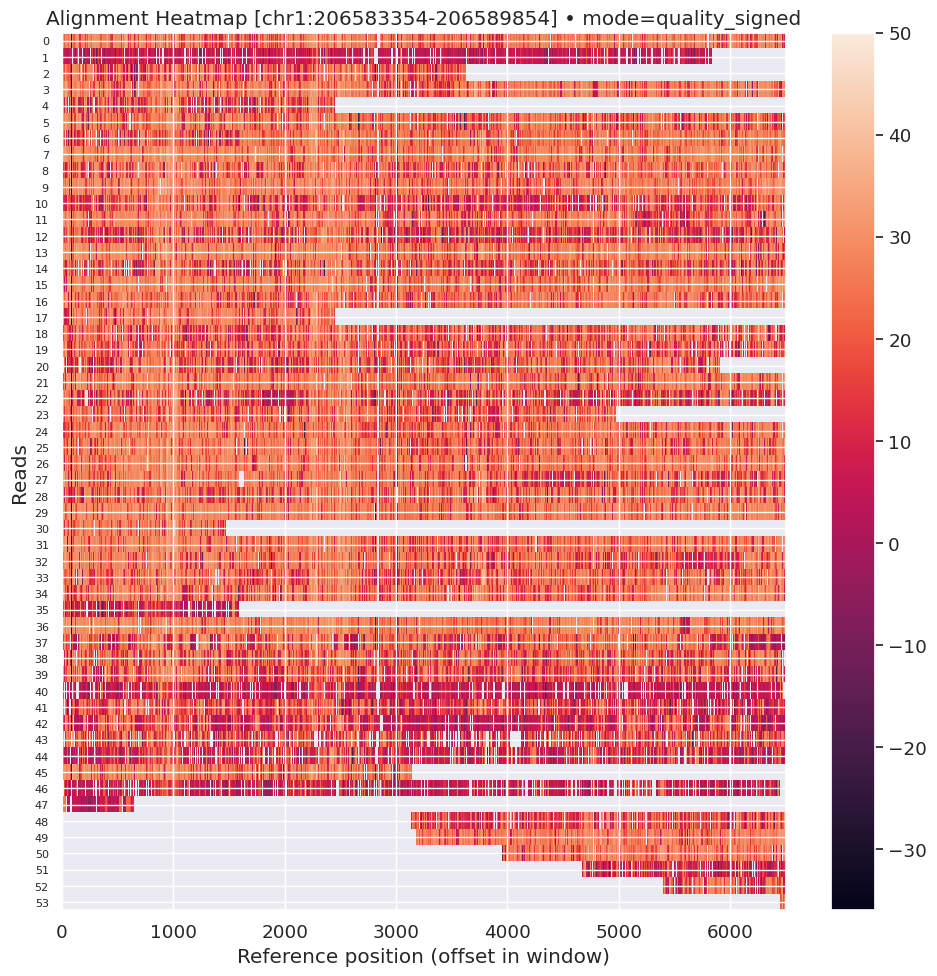

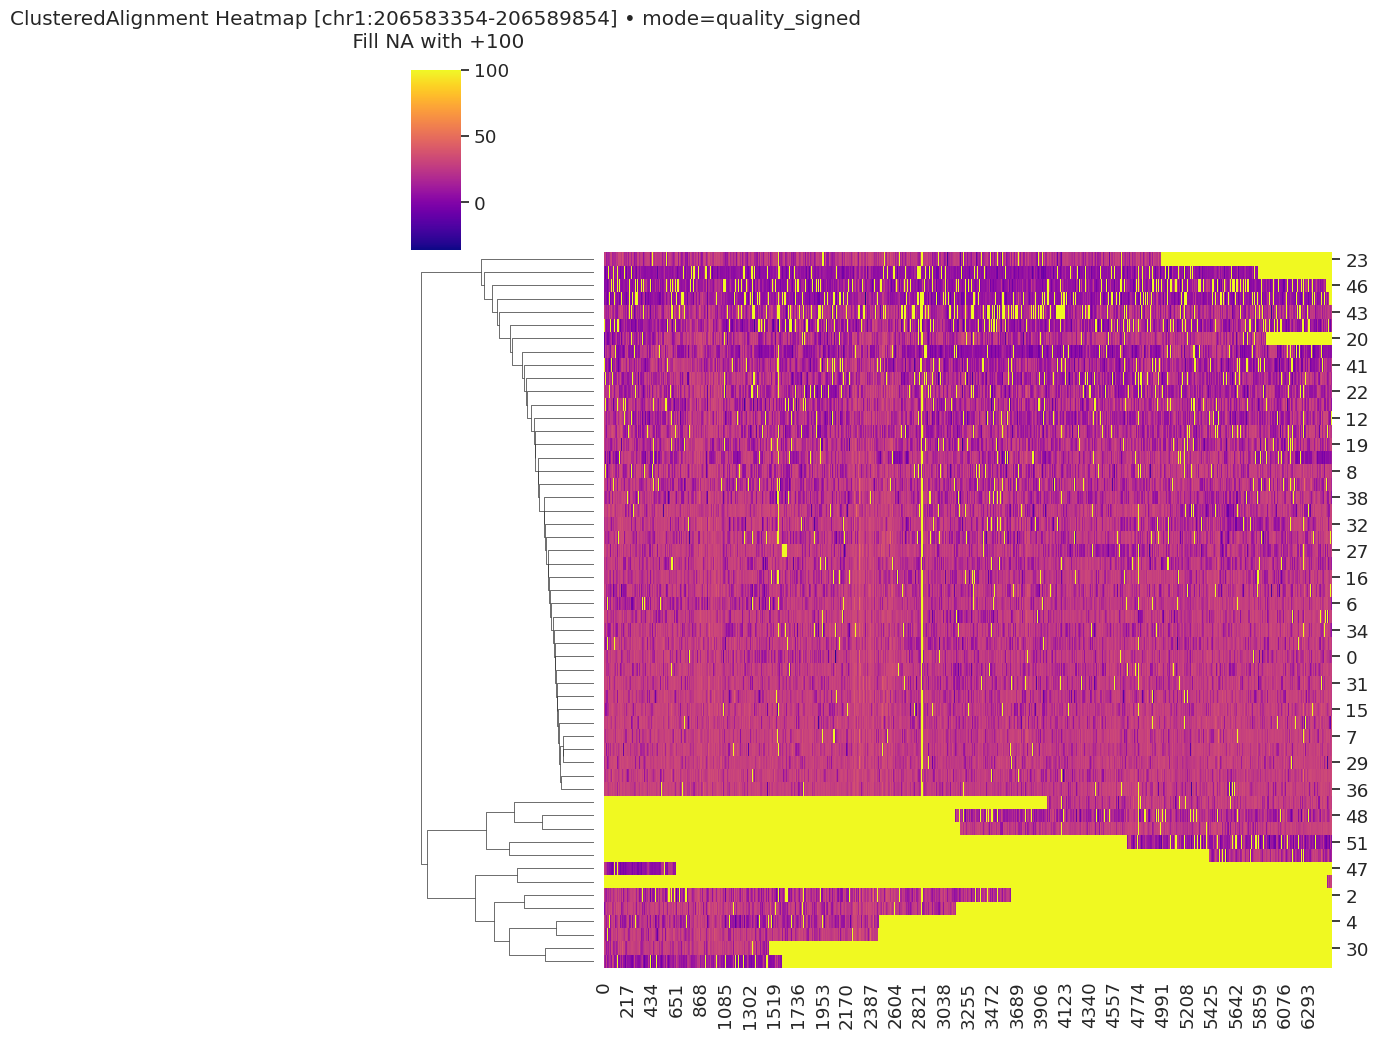

In [30]:
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams

bam = unedit_bam_path # removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)


# Threshold 20%*mean(mC in alll reads)

In [31]:
threshold_percent = 20
filtered_reads_df, methylation_counts, remove_reads_df = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

Mean methylated CGs per read: 10.0
Maximum methylated CGs per read: 23.0
Threshold (20% of max): 2.00
Original number of reads: 22
Number of reads after filtering: 21
Removed 1 reads


read_name_str read_name read_id_number   mod  \
0    cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
1    cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
2    cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
3    cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
4    6c2e1011-3c7f-46a8-8669-57e7c9de0953         5              5  CG,0   
..                                    ...       ...            ...   ...   
259  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   
260  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   
261  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   
262  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   
263  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   

      pos  read_lengths  mapping_qualities  avg_base_qualities  \
0   -2209          6749                 60           24.754630   
1   -1225          6749                 60           24.754630   
2    2608          6749                 60           24.754630   
3    2832          6749                 60           24.754630   
4   -2452          6779                 60           22.085706   
..    ...           ...                ...                 ...   
259 -2376          6885                 60           21.036747   
260 -2196          6885                 60           21.036747   
261 -2192          6885                 60           21.036747   
262  -583          6885                 60           21.036747   
263  1570          6885                 60           21.036747   

     num_overlap_aligned_bases  fraction_overlap_aligned  num_nones  \
0                         6403                  0.985077         99   
1                         6403                  0.985077         99   
2                         6403                  0.985077         99   
3                         6403                  0.985077         99   
4                         6363                  0.978923        138   
..                         ...                       ...        ...   
259                       6329                  0.973692        188   
260                       6329                  0.973692        188   
261                       6329                  0.973692        188   
262                       6329                  0.973692        188   
263                       6329                  0.973692        188   

     fraction_nones  num_inserts  fraction_inserts  num_mismatches  \
0          0.014669           81          0.012002              32   
1          0.014669           81          0.012002              32   
2          0.014669           81          0.012002              32   
3          0.014669           81          0.012002              32   
4          0.020357          135          0.019914              78   
..              ...          ...               ...             ...   
259        0.027306          117          0.016993             126   
260        0.027306          117          0.016993             126   
261        0.027306          117          0.016993             126   
262        0.027306          117          0.016993             126   
263        0.027306          117          0.016993             126   

     fraction_mismatches  num_ambiguous  pos_shifted  num_CG_methylated  
0               0.004741              0         1041                1.0  
1               0.004741              0         2025                1.0  
2               0.004741              0         5858                1.0  
3               0.004741              0         6082                1.0  
4               0.011506              0          798                1.0  
..                   ...            ...          ...                ...  
259             0.018301              0          874                1.0  
260             0.018301            

In [32]:
remove_reads_df

read_name_str read_name read_id_number   mod   pos  \
11  44c32adc-5f73-4b85-95eb-e4caa5173cf8         6              6  CG,0 -2897   

    read_lengths  mapping_qualities  avg_base_qualities  \
11          6763                 60           23.058406   

    num_overlap_aligned_bases  fraction_overlap_aligned  num_nones  \
11                       6360                  0.978462        145   

    fraction_nones  num_inserts  fraction_inserts  num_mismatches  \
11         0.02144          128          0.018927              68   

    fraction_mismatches  num_ambiguous  pos_shifted  num_CG_methylated  
11             0.010055              0          353                1.0

In [33]:
bam_path

'/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

In [34]:
!pwd

/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/unedited/analyze_single_reads


In [35]:
# output_dir_path = '/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/' # "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/"
removed_reads_bam_name = "reads_with_mC_less_than_mean_x_" +  str(threshold_percent) + "_" + experiment_name +".bam"
removed_output_bam_path=Path(output_dir_path, removed_reads_bam_name)
removed_output_bam_path

PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/reads_with_mC_less_than_mean_x_20_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [36]:
subset_BAM_by_read_IDs(original_bam_path, remove_reads_df, output_bam_path=removed_output_bam_path, index_output=True)


Subset BAM written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/reads_with_mC_less_than_mean_x_20_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam
Index written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/reads_with_mC_less_than_mean_x_20_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam.bai


PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/reads_with_mC_less_than_mean_x_20_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

# Save filtered reads to BAM

In [37]:
# output_dir_path = "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/outputs"
removed_reads_bam_name = "filtered_reads_with_mC_MORE_than_mean_x_" +  str(threshold_percent) + "_" + experiment_name +".bam"
filtered_output_bam_path=Path(output_dir_path, removed_reads_bam_name)
filtered_output_bam_path

PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_20_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [38]:
subset_BAM_by_read_IDs(original_bam_path, filtered_reads_df, output_bam_path=filtered_output_bam_path, index_output=True)


Subset BAM written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_20_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam
Index written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_20_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam.bai


PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_20_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [39]:
sam_path = bam_to_sam(filtered_output_bam_path, sam_path=None)
sam_path

Converted BAM → SAM: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_20_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.sam


PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_20_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.sam')

In [40]:
# sam_path = bam_to_sam(removed_output_bam_path, sam_path=None)
# sam_path
# removed_reads_bam_path = '/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam'
# removed_reads_bam_path
# plot_bam_quality_metrics(removed_reads_bam_path)

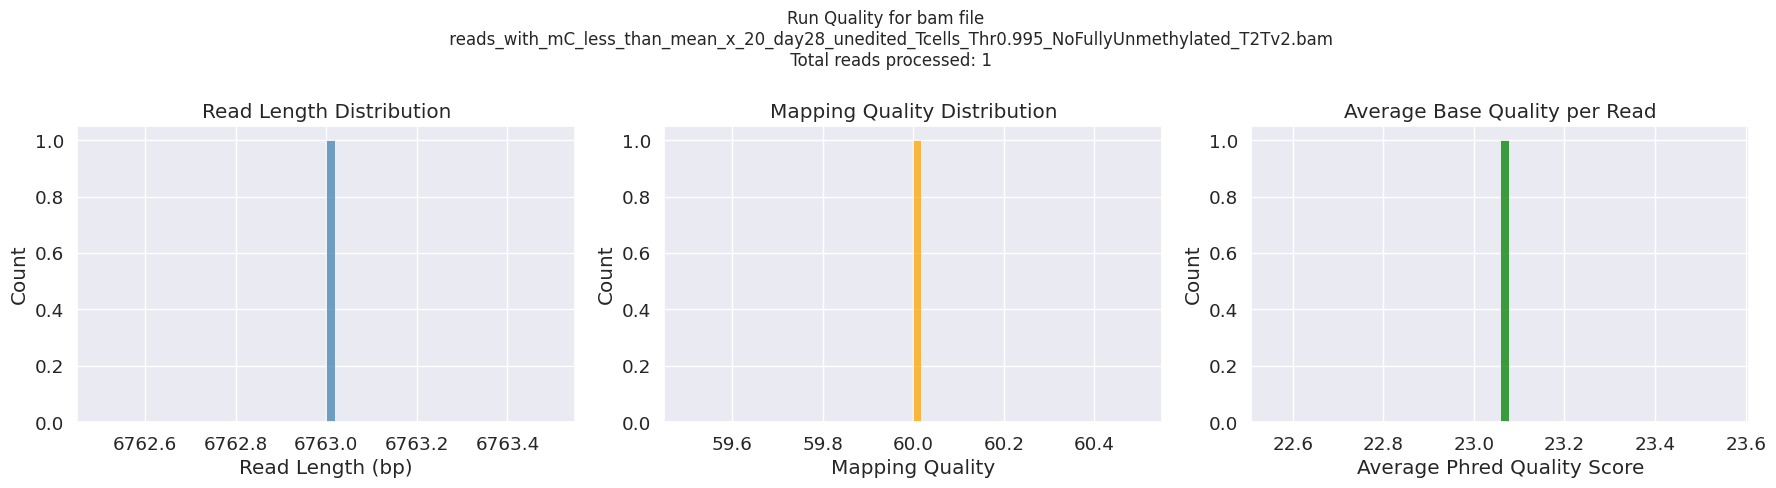

Total reads processed: 1


In [41]:

plot_bam_quality_metrics(removed_output_bam_path)

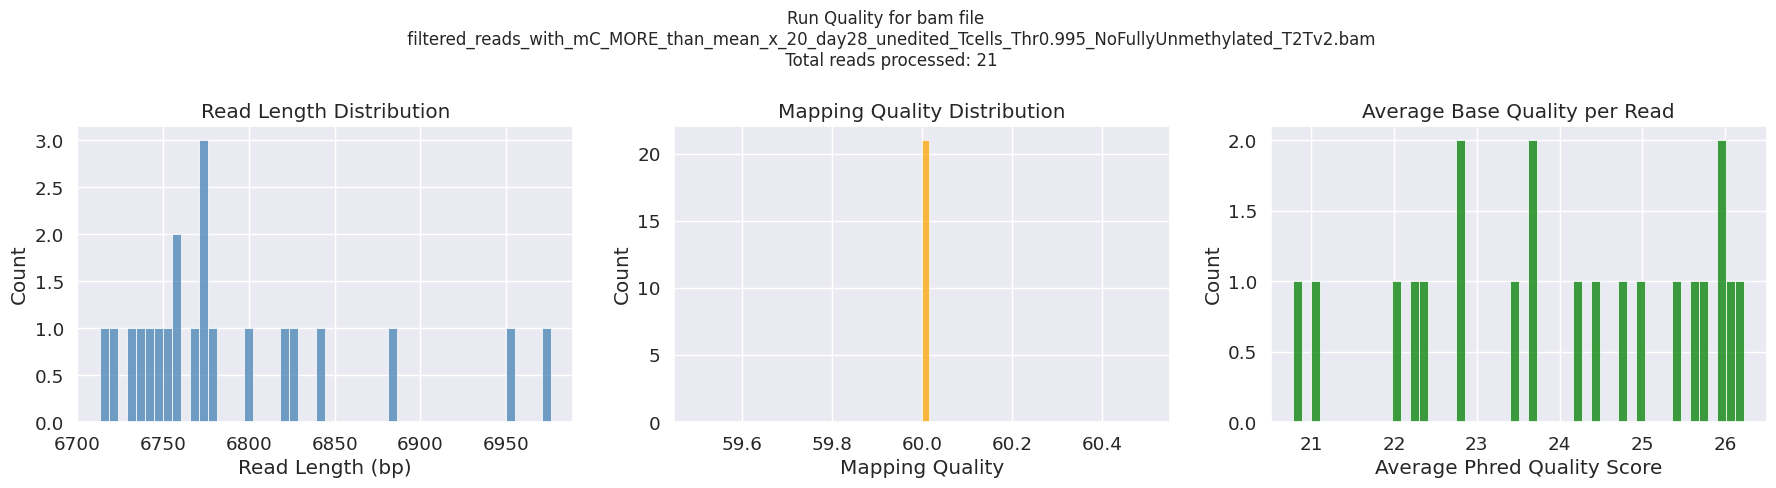

Total reads processed: 21


In [42]:
plot_bam_quality_metrics(filtered_output_bam_path)

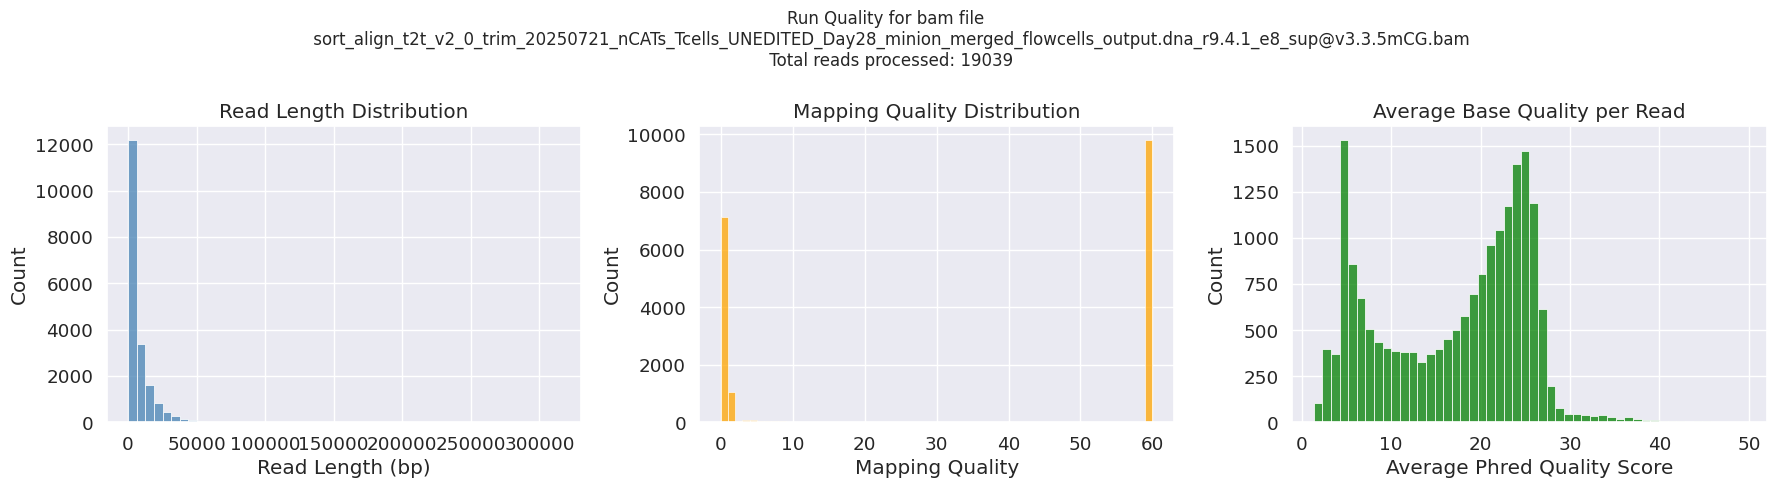

Total reads processed: 19039


In [43]:
plot_bam_quality_metrics(original_bam_path)

# Load BAM files

In [44]:
# removed_reads_bam_path= '/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam'
# removed_reads_bam_path
# plot_bam_quality_metrics(removed_reads_bam_path)

In [45]:
region_str

'chr1:206583354-206589854'

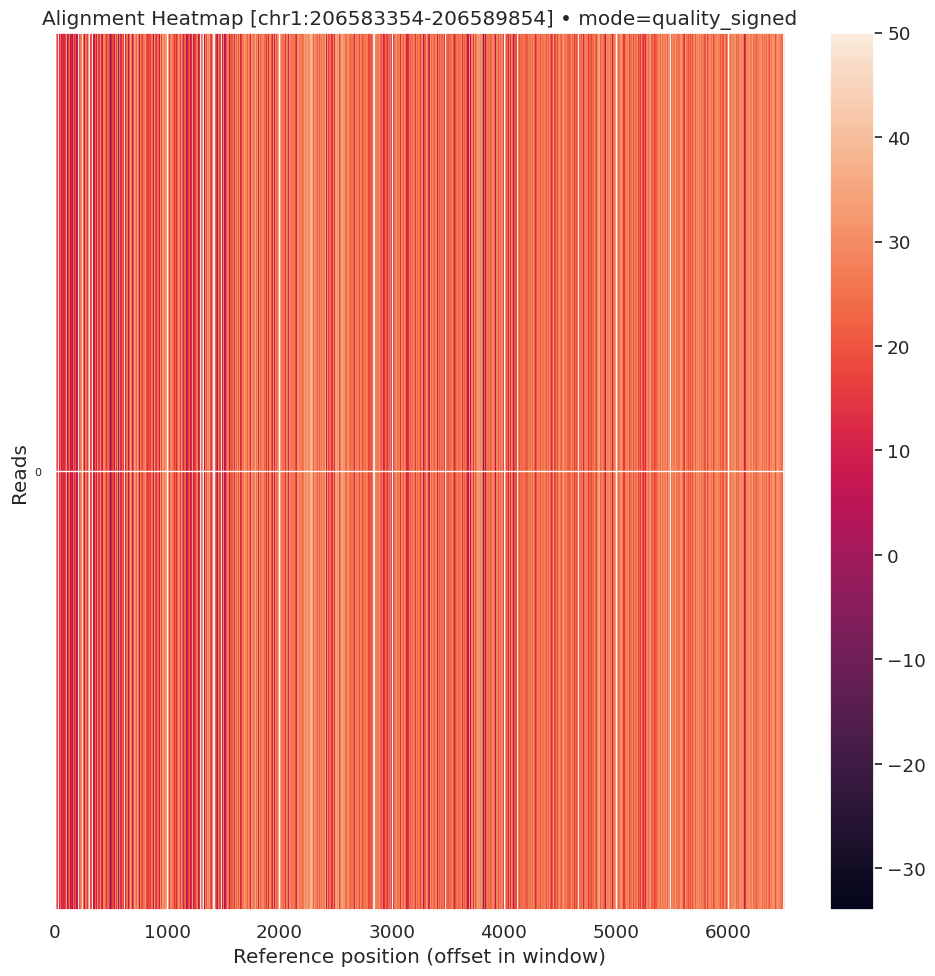

ValueError: Linkage must be computed on at least two observations.

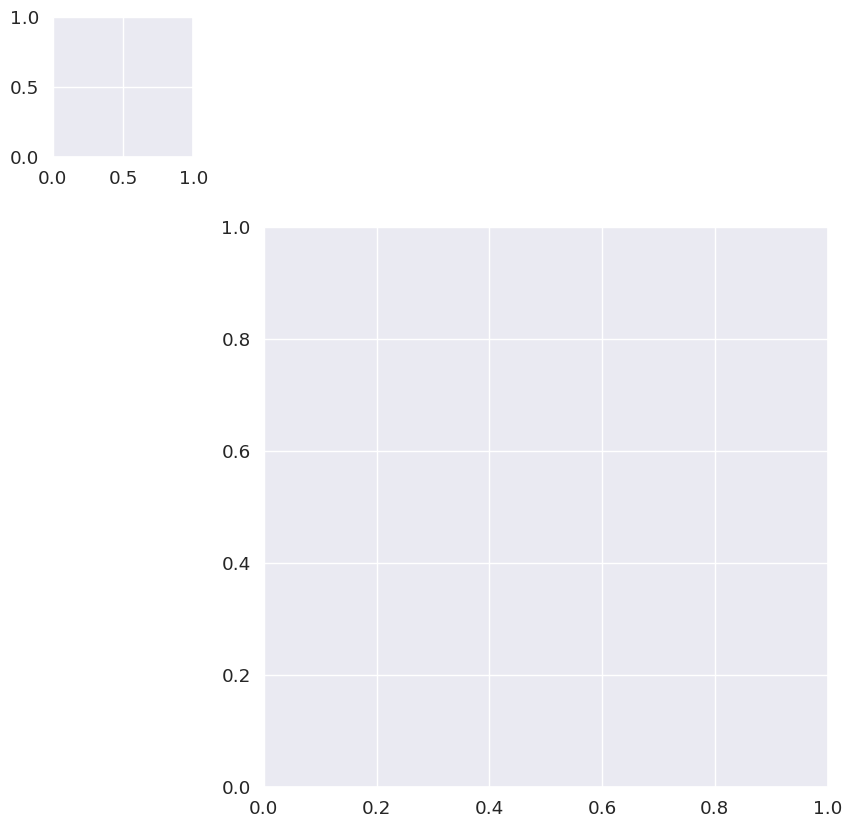

In [46]:
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams


bam = removed_output_bam_path # removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)

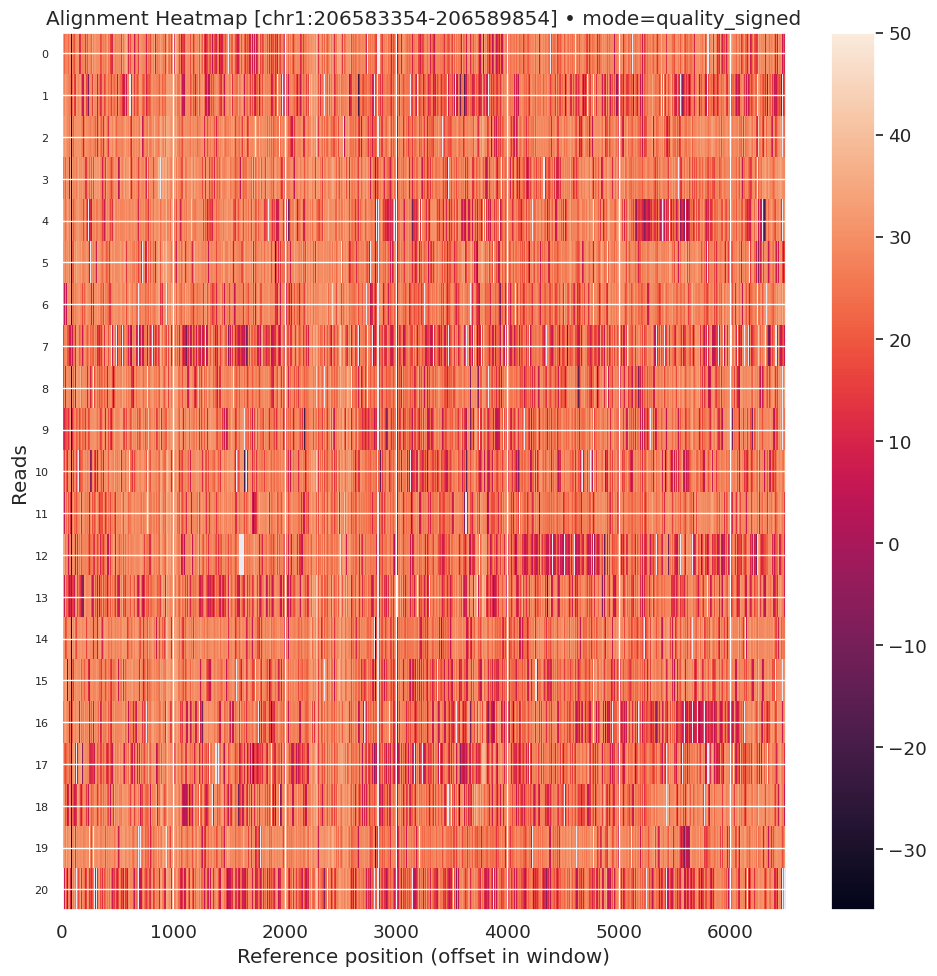

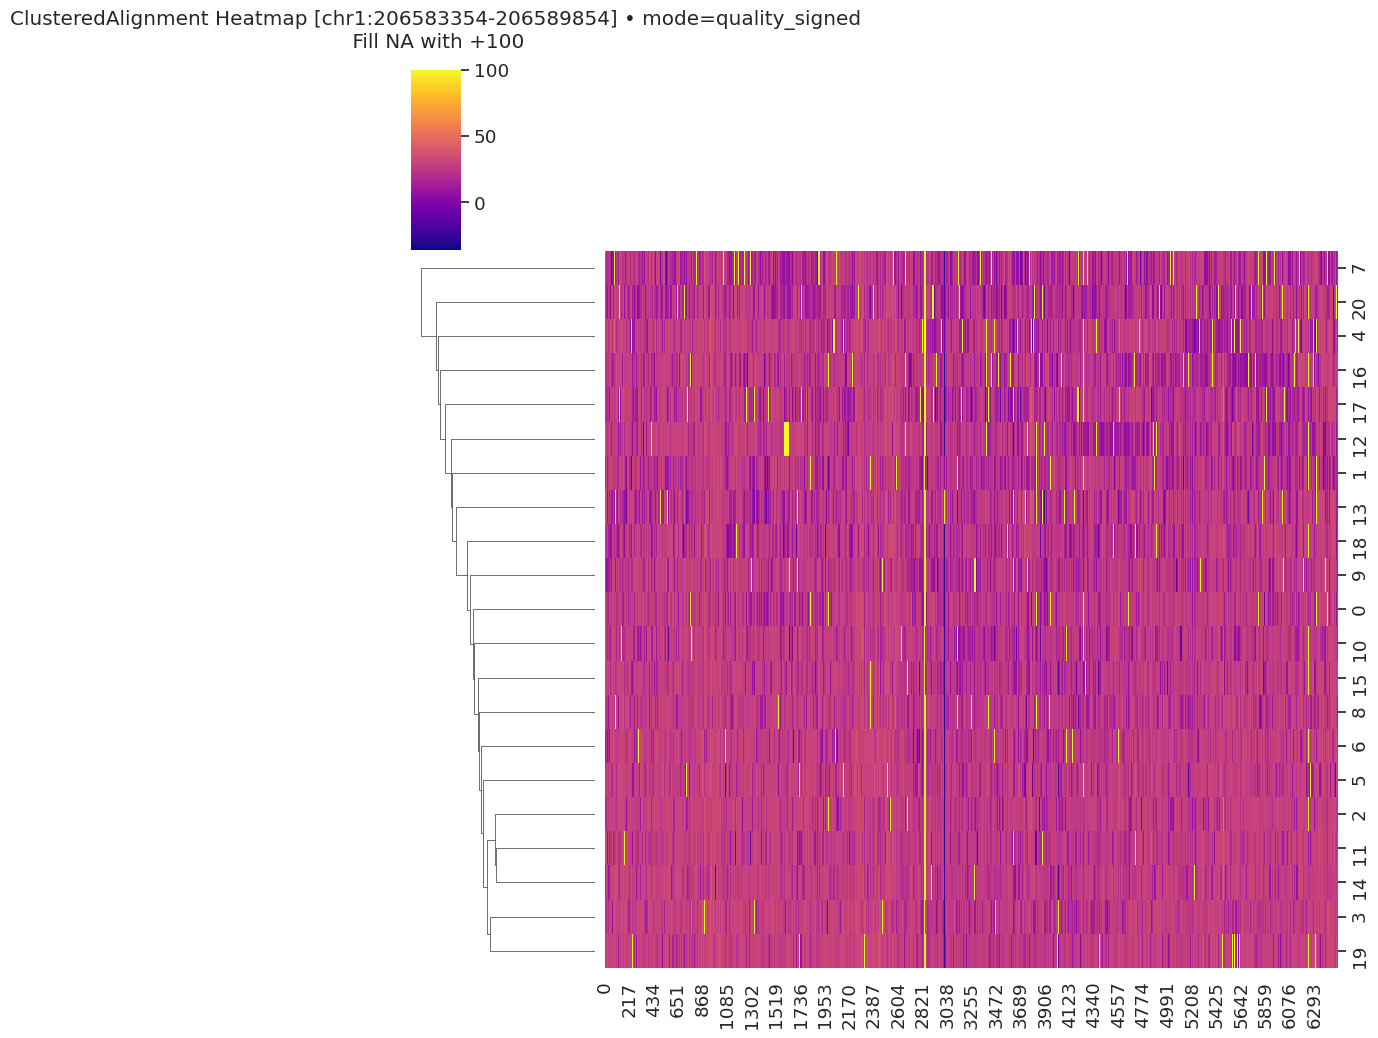

In [47]:


sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams

bam = filtered_output_bam_path  #  removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)



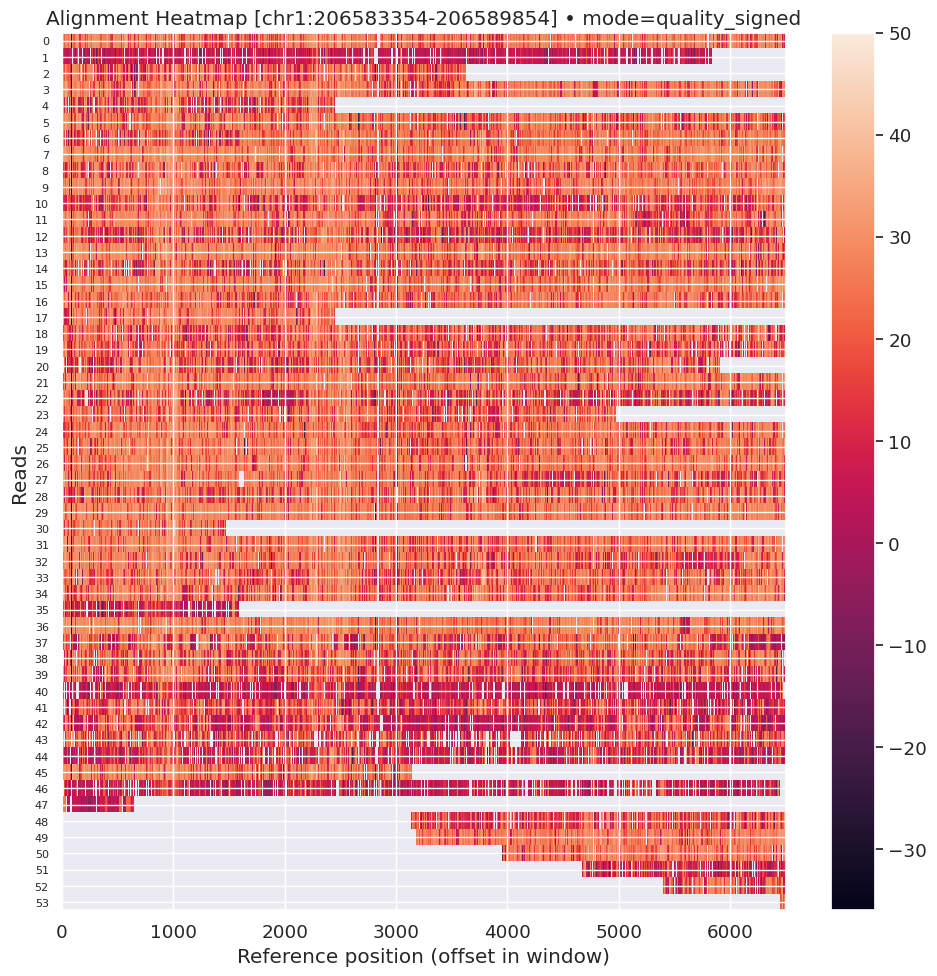

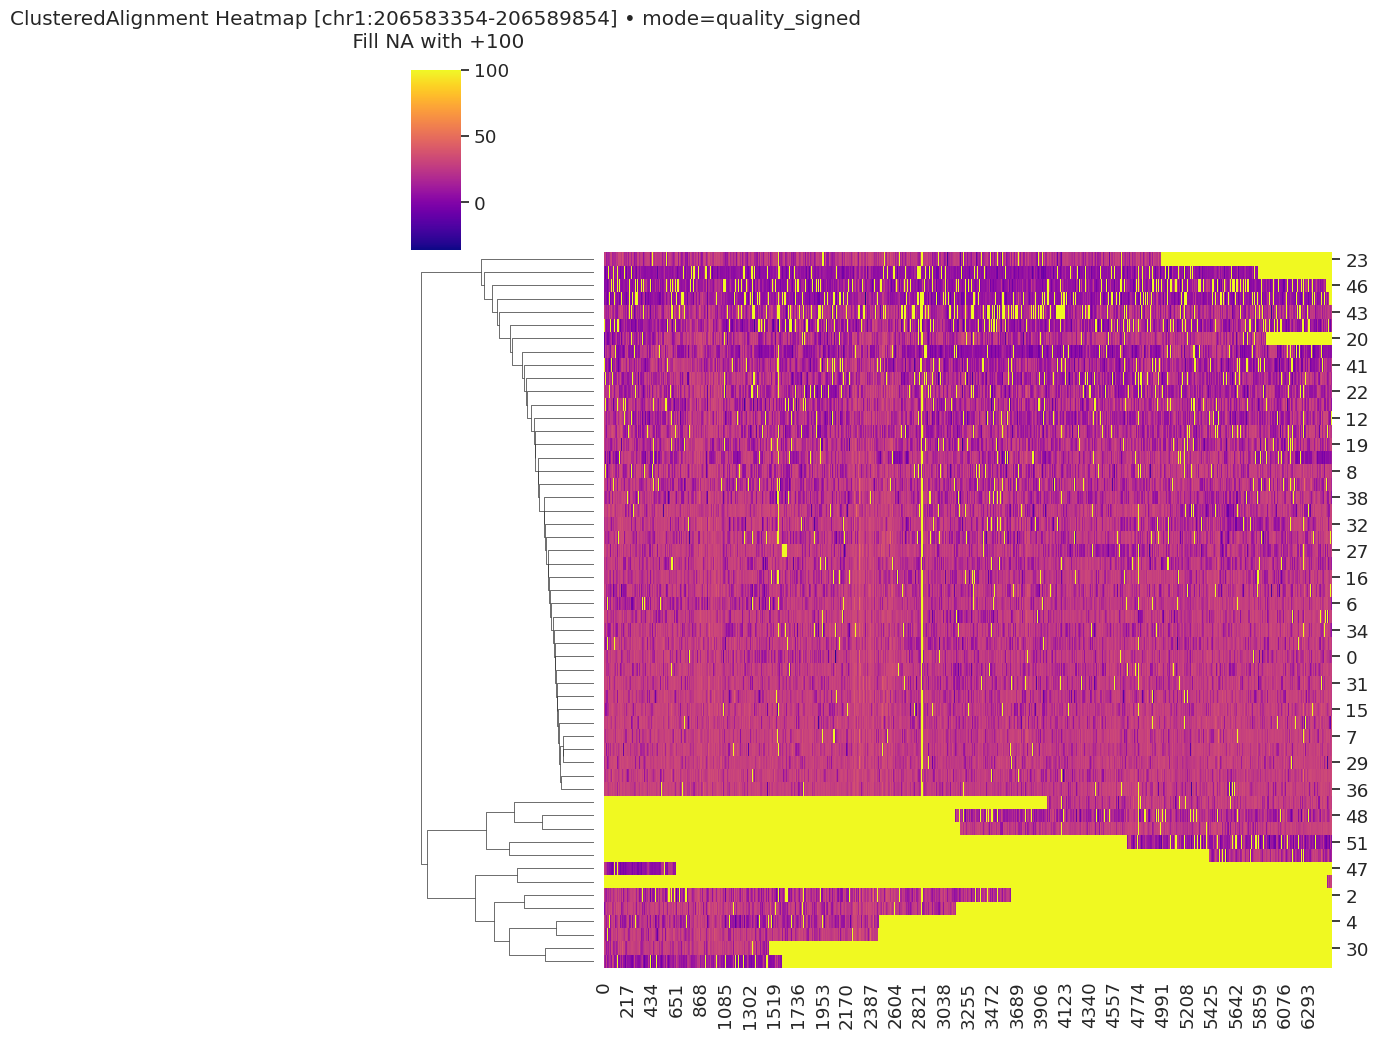

In [48]:
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams

bam = unedit_bam_path # removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)


# Threshold 5%*mean(mC in alll reads)

In [49]:
threshold_percent = 5
filtered_reads_df, methylation_counts, remove_reads_df = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

Mean methylated CGs per read: 10.0
Maximum methylated CGs per read: 23.0
Threshold (5% of max): 0.50
Original number of reads: 22
Number of reads after filtering: 22
Removed 0 reads


read_name_str read_name read_id_number   mod  \
0    cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
1    cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
2    cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
3    cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
4    6c2e1011-3c7f-46a8-8669-57e7c9de0953         5              5  CG,0   
..                                    ...       ...            ...   ...   
259  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   
260  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   
261  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   
262  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   
263  f6f2280f-01db-426f-acfc-56475979d15f        38             38  CG,0   

      pos  read_lengths  mapping_qualities  avg_base_qualities  \
0   -2209          6749                 60           24.754630   
1   -1225          6749                 60           24.754630   
2    2608          6749                 60           24.754630   
3    2832          6749                 60           24.754630   
4   -2452          6779                 60           22.085706   
..    ...           ...                ...                 ...   
259 -2376          6885                 60           21.036747   
260 -2196          6885                 60           21.036747   
261 -2192          6885                 60           21.036747   
262  -583          6885                 60           21.036747   
263  1570          6885                 60           21.036747   

     num_overlap_aligned_bases  fraction_overlap_aligned  num_nones  \
0                         6403                  0.985077         99   
1                         6403                  0.985077         99   
2                         6403                  0.985077         99   
3                         6403                  0.985077         99   
4                         6363                  0.978923        138   
..                         ...                       ...        ...   
259                       6329                  0.973692        188   
260                       6329                  0.973692        188   
261                       6329                  0.973692        188   
262                       6329                  0.973692        188   
263                       6329                  0.973692        188   

     fraction_nones  num_inserts  fraction_inserts  num_mismatches  \
0          0.014669           81          0.012002              32   
1          0.014669           81          0.012002              32   
2          0.014669           81          0.012002              32   
3          0.014669           81          0.012002              32   
4          0.020357          135          0.019914              78   
..              ...          ...               ...             ...   
259        0.027306          117          0.016993             126   
260        0.027306          117          0.016993             126   
261        0.027306          117          0.016993             126   
262        0.027306          117          0.016993             126   
263        0.027306          117          0.016993             126   

     fraction_mismatches  num_ambiguous  pos_shifted  num_CG_methylated  
0               0.004741              0         1041                1.0  
1               0.004741              0         2025                1.0  
2               0.004741              0         5858                1.0  
3               0.004741              0         6082                1.0  
4               0.011506              0          798                1.0  
..                   ...            ...          ...                ...  
259             0.018301              0          874                1.0  
260             0.018301            

In [50]:
remove_reads_df

Empty DataFrame
Columns: [read_name_str, read_name, read_id_number, mod, pos, read_lengths, mapping_qualities, avg_base_qualities, num_overlap_aligned_bases, fraction_overlap_aligned, num_nones, fraction_nones, num_inserts, fraction_inserts, num_mismatches, fraction_mismatches, num_ambiguous, pos_shifted, num_CG_methylated]
Index: []

In [51]:
bam_path

'/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

In [52]:
!pwd

/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/unedited/analyze_single_reads


In [53]:
# output_dir_path = '/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/' # "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/"
removed_reads_bam_name = "reads_with_mC_less_than_mean_x_" +  str(threshold_percent) + "_" + experiment_name +".bam"
removed_output_bam_path=Path(output_dir_path, removed_reads_bam_name)
removed_output_bam_path

PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/reads_with_mC_less_than_mean_x_5_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [54]:
remove_reads_df

Empty DataFrame
Columns: [read_name_str, read_name, read_id_number, mod, pos, read_lengths, mapping_qualities, avg_base_qualities, num_overlap_aligned_bases, fraction_overlap_aligned, num_nones, fraction_nones, num_inserts, fraction_inserts, num_mismatches, fraction_mismatches, num_ambiguous, pos_shifted, num_CG_methylated]
Index: []

In [55]:
subset_BAM_by_read_IDs(original_bam_path, remove_reads_df, output_bam_path=removed_output_bam_path, index_output=True)


ValueError: remove_mCG_reads_df has no read names to subset.

# Save filtered reads to BAM

In [56]:
# output_dir_path = "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/outputs"
removed_reads_bam_name = "filtered_reads_with_mC_MORE_than_mean_x_" +  str(threshold_percent) + "_" + experiment_name +".bam"
filtered_output_bam_path=Path(output_dir_path, removed_reads_bam_name)
filtered_output_bam_path

PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_5_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [57]:
subset_BAM_by_read_IDs(original_bam_path, filtered_reads_df, output_bam_path=filtered_output_bam_path, index_output=True)


Subset BAM written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_5_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam
Index written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_5_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam.bai


PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_5_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [58]:
sam_path = bam_to_sam(filtered_output_bam_path, sam_path=None)
sam_path

Converted BAM → SAM: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_5_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.sam


PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_5_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.sam')

In [59]:
# sam_path = bam_to_sam(removed_output_bam_path, sam_path=None)
# sam_path
# removed_reads_bam_path = '/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam'
# removed_reads_bam_path
# plot_bam_quality_metrics(removed_reads_bam_path)

In [60]:

plot_bam_quality_metrics(removed_output_bam_path)

[E::hts_open_format] Failed to open file "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/reads_with_mC_less_than_mean_x_5_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam" : No such file or directory


FileNotFoundError: [Errno 2] could not open alignment file `/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/reads_with_mC_less_than_mean_x_5_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam`: No such file or directory

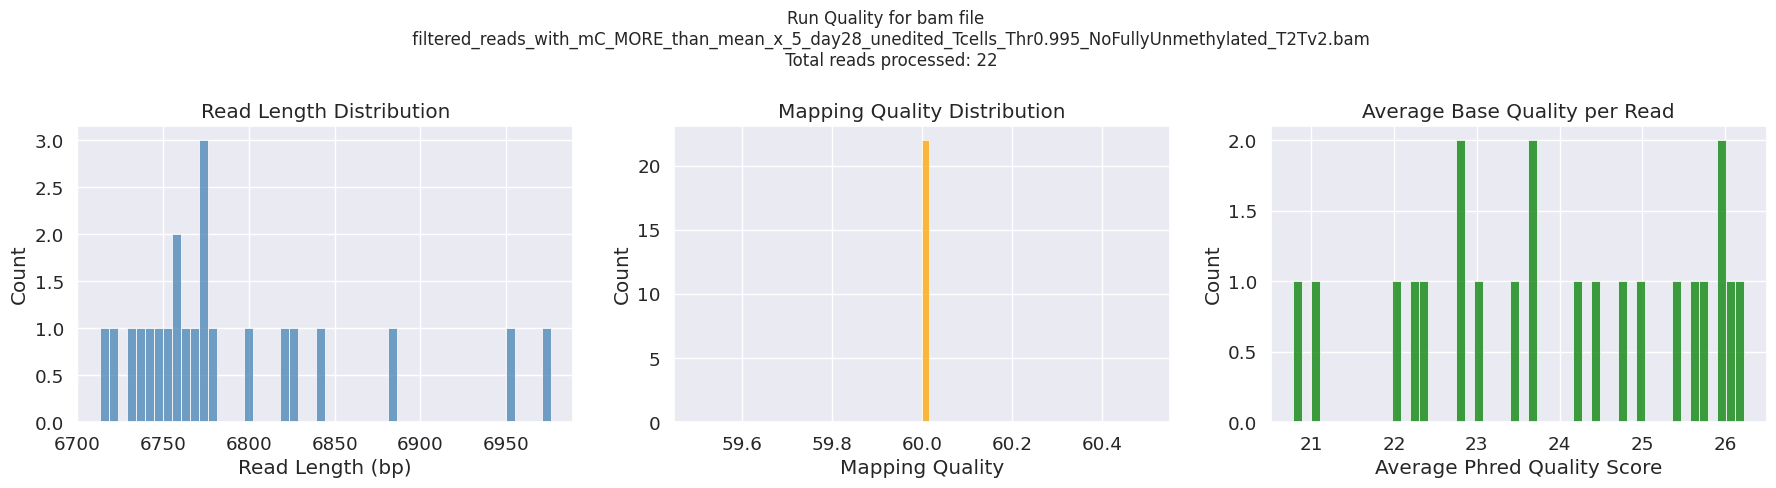

Total reads processed: 22


In [61]:
plot_bam_quality_metrics(filtered_output_bam_path)

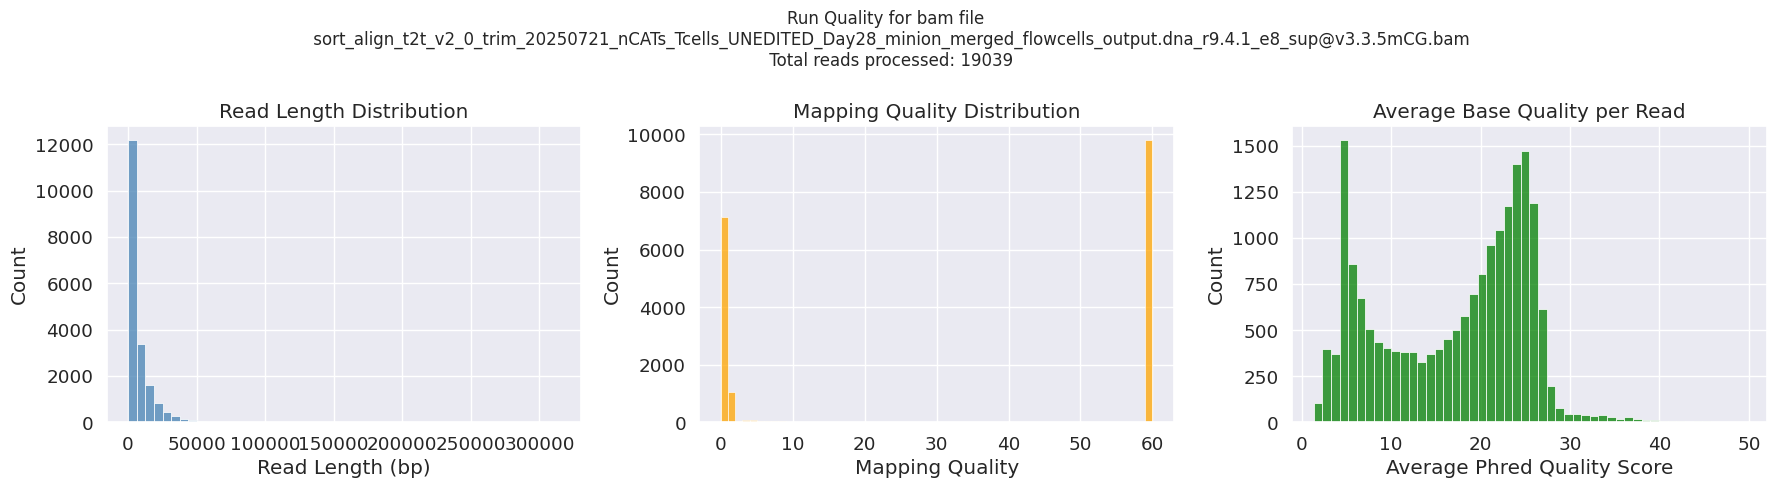

Total reads processed: 19039


In [62]:
plot_bam_quality_metrics(original_bam_path)

# Load BAM files

In [63]:
# removed_reads_bam_path= '/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam'
# removed_reads_bam_path
# plot_bam_quality_metrics(removed_reads_bam_path)

In [64]:
region_str

'chr1:206583354-206589854'

In [65]:
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams


bam = removed_output_bam_path # removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)

[E::hts_open_format] Failed to open file "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/reads_with_mC_less_than_mean_x_5_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam" : No such file or directory


FileNotFoundError: [Errno 2] could not open alignment file `/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/output/reads_with_mC_less_than_mean_x_5_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam`: No such file or directory

In [ ]:


sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams

bam = filtered_output_bam_path  #  removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)



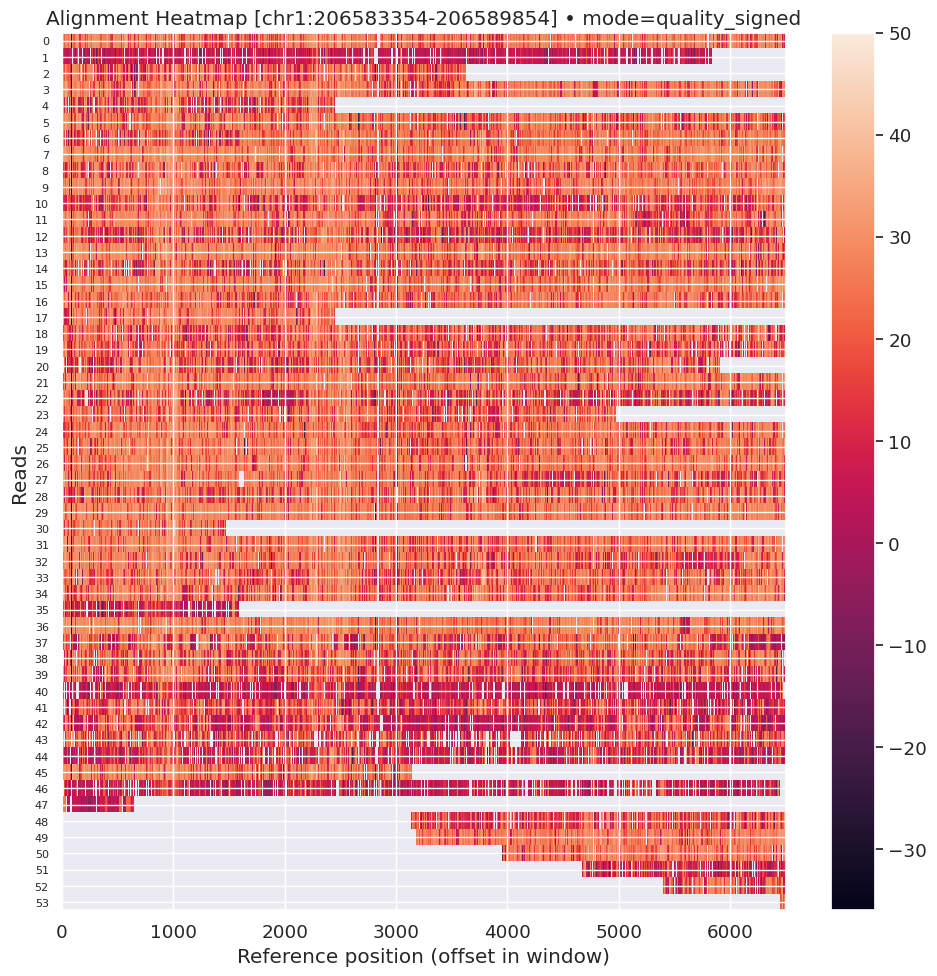

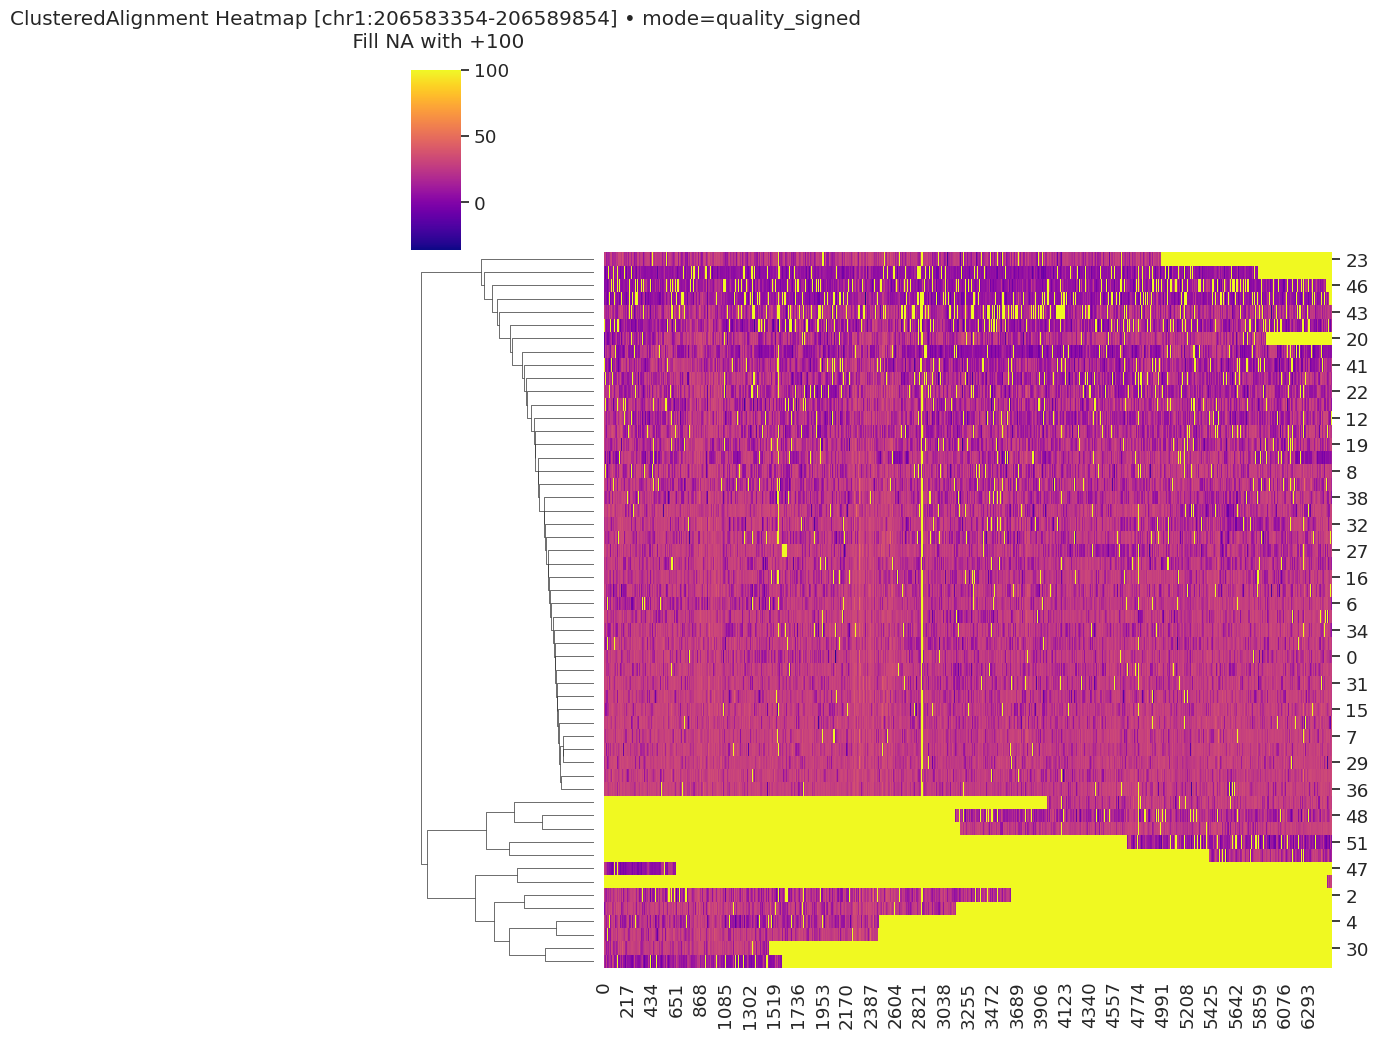

In [66]:
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams

bam = unedit_bam_path # removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)
